## FINAL ASSIGNMENT  _  MARAKI SOFIA MARIA

#### From the first time I found Meteorites landing a very interesting topic,since it deals with an unusual phenomenon about which we may not be aware. So, i started with the Meteorites Landing Data( which is made by NASA and I found it in Kaggle web site (https://www.kaggle.com/nasa/meteorite-landings) . At the same time, the selection of this topic was made because I am interested in exploring data that have to do with earth and environment and I wanted to  experiment with libraries, data and code which create different maps . The initial inspiration was the assignment 5 during which we analysed data in order to plot maps.

#### some inspirations for the final outcome are the following maps which describe relationship of a specific aspect with locations:

![alt text](https://cloud.githubusercontent.com/assets/22922622/22421419/ee2439ce-e6de-11e6-8f81-b4565cd2cd56.jpg
"title")

![alt text](https://cloud.githubusercontent.com/assets/22922622/22421387/c3bdec52-e6de-11e6-8a26-28522058aba5.png
"title")

#### Subsequently, US hurricane (1851-2004)(https://www.kaggle.com/noaa/hurricane-database) (http://www.mapcruzin.com/natural-disaster-shapefiles/hurricane-arcgis-shapefile-download.htm) shapefile was imported to the code in order to realise how strange phenomena    affect US both in country and sea and if there is any overlapping of these phenomena.

#### The questions that i want to answer is how meteorites are distributed to earth and how this distribution changes throughout the years.
#### Also, by zooming to a specific location i want to understand how different phenomena affects a place and if there is any relationship .
#### The following code is separated into two parts the first part is an exploration and analysis of the Meteorites Landing Data and the second is a combination of this data with US hurricane1851-2004) shapefile.

## Part 01

#### Starting the story of meteorites 

####  The course of history begins by breaking down  the data in centuries and plot relevant maps.This will help us understand to which places meteorites land the most. Simultaneously, graphic plots with the same topic will be created in order to understand the density in landing of the recorded meteorites throughout the years.

In [1]:
#importing all the needed libraries
import numpy as np                       
import pandas as pd                      
import matplotlib.pyplot as plt          
from mpl_toolkits.basemap import Basemap 
import seaborn as sns   

In [2]:
#import csv file name: Meteorite Landings from: https://www.kaggle.com/nasa/meteorite-landings
df= pd.read_csv('Mlandings.csv')
#general information about the csv file
df.info() #we can se that there are 45716 total records but 38401 non-null refering to reclat and reclon

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
name           45716 non-null object
id             45716 non-null int64
nametype       45716 non-null object
recclass       45716 non-null object
mass           45585 non-null float64
fall           45716 non-null object
year           45428 non-null float64
reclat         38401 non-null float64
reclong        38401 non-null float64
GeoLocation    38401 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [3]:
# So, we need to keep only the ones that have valid lontitude and latitude and not 0
df = df[(df.reclat != 0.0) & (df.reclong != 0.0)]
#delete the rows with null Geolocation content
df = df[df.GeoLocation.notnull()] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31963 entries, 0 to 45715
Data columns (total 10 columns):
name           31963 non-null object
id             31963 non-null int64
nametype       31963 non-null object
recclass       31963 non-null object
mass           31844 non-null float64
fall           31963 non-null object
year           31816 non-null float64
reclat         31963 non-null float64
reclong        31963 non-null float64
GeoLocation    31963 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 2.7+ MB


In [4]:
#Now, df consist only of non-null and =!0 geolocation entries
df

name     id nametype              recclass       mass  \
0                   Aachen      1    Valid                    L5       21.0   
1                   Aarhus      2    Valid                    H6      720.0   
2                     Abee      6    Valid                   EH4   107000.0   
3                 Acapulco     10    Valid           Acapulcoite     1914.0   
4                  Achiras    370    Valid                    L6      780.0   
5                 Adhi Kot    379    Valid                   EH4     4239.0   
6      Adzhi-Bogdo (stone)    390    Valid                 LL3-6      910.0   
7                     Agen    392    Valid                    H5    30000.0   
8                   Aguada    398    Valid                    L6     1620.0   
9            Aguila Blanca    417    Valid                     L     1440.0   
10        Aioun el Atrouss    423    Valid          Diogenite-pm     1000.0   
11                     Aïr    424    Valid                    L6    24000.0   
12         Aire-sur-la-Lys    425    Valid               Unknown        NaN   
13                   Akaba    426    Valid                    L6      779.0   
14                Akbarpur    427    Valid                    H4     1800.0   
15                 Akwanga    432    Valid                     H     3000.0   
16                 Akyumak    433    Valid             Iron, IVA    50000.0   
17                 Al Rais    446    Valid                CR2-an      160.0   
18               Al Zarnkh    447    Valid                   LL5      700.0   
19                   Alais    448    Valid                   CI1     6000.0   
20                Albareto    453    Valid                 L/LL4     2000.0   
21                 Alberta    454    Valid                     L      625.0   
22         Alby sur Chéran    458    Valid         Eucrite-mmict      252.0   
23               Aldsworth    461    Valid                   LL5      700.0   
24                  Aleppo    462    Valid                    L6     3200.0   
25             Alessandria    463    Valid                    H5      908.0   
26           Alexandrovsky    465    Valid                    H4     9251.0   
27              Alfianello    466    Valid                    L6   228000.0   
28                 Allegan   2276    Valid                    H5    32000.0   
29                 Allende   2278    Valid                   CV3  2000000.0   
...                    ...    ...      ...                   ...        ...   
45685                Youxi  55793    Valid        Mesosiderite-C   218000.0   
45686               Ysleta  30375    Valid       Iron, ungrouped   140700.0   
45687            Yucca 015  57175    Valid               H-metal        3.0   
45688            Yucca 016  57158    Valid                    H5       25.9   
45689            Yucca 017  57159    Valid                    H5      200.0   
45690               Yudoma  30376    Valid             Iron, IVA     7600.0   
45691     Zacatecas (1792)  30381    Valid       Iron, ungrouped  1000000.0   
45693               Zaffra  30383    Valid          Iron, IAB-MG     3000.0   
45694              Zag (b)  30385    Valid             Winonaite      300.0   
45695               Zagora  30387    Valid         Iron, IAB-ung    50000.0   
45696            Zakłodzie  30390    Valid        Enst achon-ung     8680.0   
45697           Zapaliname  30392    Valid          Iron, IAB-MG    85000.0   
45698        Zapata County  30393    Valid                  Iron        NaN   
45699   Zapotitlán Salinas  30394    Valid                    L4       27.7   
45700             Zaragoza  48916    Valid          Iron, IVA-an   162000.0   
45701               Zegdou  30398    Valid                    H3     6700.0   
45702              Zelfana  31353    Valid                    L5     1058.0   
45703                Zenda  30400    Valid     Iron, IAB complex     3700.0   
45704                Zerga  30402    Valid                   LL6       7

In [5]:
#acording to the descreption of the file the correct entries are only the ones that years are between 860 and 2016
df= df[df.year > 860]
df= df[df.year <2016]
df.sort_values(by="year")

name     id nametype           recclass        mass  \
678                      Narni  16914    Valid         Stone-uncl         NaN   
278                    Elbogen   7823    Valid          Iron, IID    107000.0   
852           Rivolta de Bassi  22614    Valid         Stone-uncl       103.3   
283                  Ensisheim  10039    Valid                LL6    127000.0   
1040                 Valdinoce  24146    Valid         Stone-uncl         NaN   
729               Oliva-Gandia  18012    Valid         Stone-uncl         NaN   
5329           Campo del Cielo   5247    Valid       Iron, IAB-MG  50000000.0   
174              Castrovillari   5295    Valid         Stone-uncl     15000.0   
26166                   Morito  16745    Valid        Iron, IIIAB  10100000.0   
410                  Jalandhar  12069    Valid               Iron      1967.0   
956               Stretchleigh  23732    Valid         Stone-uncl     10400.0   
369                    Hatford  11855    Valid         Stone-uncl     29000.0   
626                   Minamino  16692    Valid                  L      1040.0   
865                      Sagan  22796    Valid         Stone-uncl         NaN   
656                Mount Vaisi  16805    Valid         Stone-uncl     17000.0   
953                  Stolzenau  23726    Valid         Stone-uncl         NaN   
312                      Fünen  10838    Valid         Stone-uncl         NaN   
709                  Novy-Ergi  17934    Valid         Stone-uncl         NaN   
1037                      Vago  24143    Valid                 H6        40.0   
736                    Ortenau  18033    Valid         Stone-uncl      4500.0   
883                   Sasagase  23187    Valid                  H       695.0   
76           Barcelona (stone)   4944    Valid                 OC         NaN   
888                   Schellin  23457    Valid                  L      7000.0   
37631                  Siratik  23615    Valid         Iron, IIAB      1700.0   
800               Ploschkovitz  18849    Valid                 L5        39.0   
37718                Steinbach  23722    Valid       Iron, IVA-an     98000.0   
836                    Rasgrad  22396    Valid         Stone-uncl     24700.0   
721                        Ogi  17994    Valid                 H6     14360.0   
17369              Krasnojarsk  12356    Valid  Pallasite, PMG-an    700000.0   
692                    Nicorps  16970    Valid         Stone-uncl         NaN   
...                        ...    ...      ...                ...         ...   
12055  Frontier Mountain 10035  54805    Valid                 H6         2.5   
21691          Los Vientos 021  57331    Valid                L~6       161.0   
12054  Frontier Mountain 10028  54845    Valid                 H4         0.9   
30982             O'Malley 002  54931    Valid                 L5         4.6   
12056  Frontier Mountain 10041  54806    Valid                 H6         0.4   
30984             O'Malley 004  54933    Valid                LL6        19.0   
30985             O'Malley 005  54934    Valid                 H5         0.7   
30986             O'Malley 006  54935    Valid                 H5         2.3   
21687          Los Vientos 014  57199    Valid                 L6       565.0   
12057  Frontier Mountain 10044  54846    Valid                 H4        15.2   
21692          Los Vientos 022  57332    Valid                L~6       663.0   
12058  Frontier Mountain 10057  54847    Valid                 H3         3.0   
21693          Los Vientos 023  57333    Valid                 L6      7090.0   
30983             O'Malley 003  54932    Valid                 H6        11.1   
38108                   Tupelo  56551    Valid                EL6       280.0   
3403                  Antelope  57455    Valid                 H4       754.0   
17252             Johannesburg  55765    Valid                 H4        63.0   
36403                 Rosamond  57434    Valid           

In [6]:
#sort values by year
df.sort_values(by="year")

name     id nametype           recclass        mass  \
678                      Narni  16914    Valid         Stone-uncl         NaN   
278                    Elbogen   7823    Valid          Iron, IID    107000.0   
852           Rivolta de Bassi  22614    Valid         Stone-uncl       103.3   
283                  Ensisheim  10039    Valid                LL6    127000.0   
1040                 Valdinoce  24146    Valid         Stone-uncl         NaN   
729               Oliva-Gandia  18012    Valid         Stone-uncl         NaN   
5329           Campo del Cielo   5247    Valid       Iron, IAB-MG  50000000.0   
174              Castrovillari   5295    Valid         Stone-uncl     15000.0   
26166                   Morito  16745    Valid        Iron, IIIAB  10100000.0   
410                  Jalandhar  12069    Valid               Iron      1967.0   
956               Stretchleigh  23732    Valid         Stone-uncl     10400.0   
369                    Hatford  11855    Valid         Stone-uncl     29000.0   
626                   Minamino  16692    Valid                  L      1040.0   
865                      Sagan  22796    Valid         Stone-uncl         NaN   
656                Mount Vaisi  16805    Valid         Stone-uncl     17000.0   
953                  Stolzenau  23726    Valid         Stone-uncl         NaN   
312                      Fünen  10838    Valid         Stone-uncl         NaN   
709                  Novy-Ergi  17934    Valid         Stone-uncl         NaN   
1037                      Vago  24143    Valid                 H6        40.0   
736                    Ortenau  18033    Valid         Stone-uncl      4500.0   
883                   Sasagase  23187    Valid                  H       695.0   
76           Barcelona (stone)   4944    Valid                 OC         NaN   
888                   Schellin  23457    Valid                  L      7000.0   
37631                  Siratik  23615    Valid         Iron, IIAB      1700.0   
800               Ploschkovitz  18849    Valid                 L5        39.0   
37718                Steinbach  23722    Valid       Iron, IVA-an     98000.0   
836                    Rasgrad  22396    Valid         Stone-uncl     24700.0   
721                        Ogi  17994    Valid                 H6     14360.0   
17369              Krasnojarsk  12356    Valid  Pallasite, PMG-an    700000.0   
692                    Nicorps  16970    Valid         Stone-uncl         NaN   
...                        ...    ...      ...                ...         ...   
12055  Frontier Mountain 10035  54805    Valid                 H6         2.5   
21691          Los Vientos 021  57331    Valid                L~6       161.0   
12054  Frontier Mountain 10028  54845    Valid                 H4         0.9   
30982             O'Malley 002  54931    Valid                 L5         4.6   
12056  Frontier Mountain 10041  54806    Valid                 H6         0.4   
30984             O'Malley 004  54933    Valid                LL6        19.0   
30985             O'Malley 005  54934    Valid                 H5         0.7   
30986             O'Malley 006  54935    Valid                 H5         2.3   
21687          Los Vientos 014  57199    Valid                 L6       565.0   
12057  Frontier Mountain 10044  54846    Valid                 H4        15.2   
21692          Los Vientos 022  57332    Valid                L~6       663.0   
12058  Frontier Mountain 10057  54847    Valid                 H3         3.0   
21693          Los Vientos 023  57333    Valid                 L6      7090.0   
30983             O'Malley 003  54932    Valid                 H6        11.1   
38108                   Tupelo  56551    Valid                EL6       280.0   
3403                  Antelope  57455    Valid                 H4       754.0   
17252             Johannesburg  55765    Valid                 H4        63.0   
36403                 Rosamond  57434    Valid           

## Create the general Map including all the entries

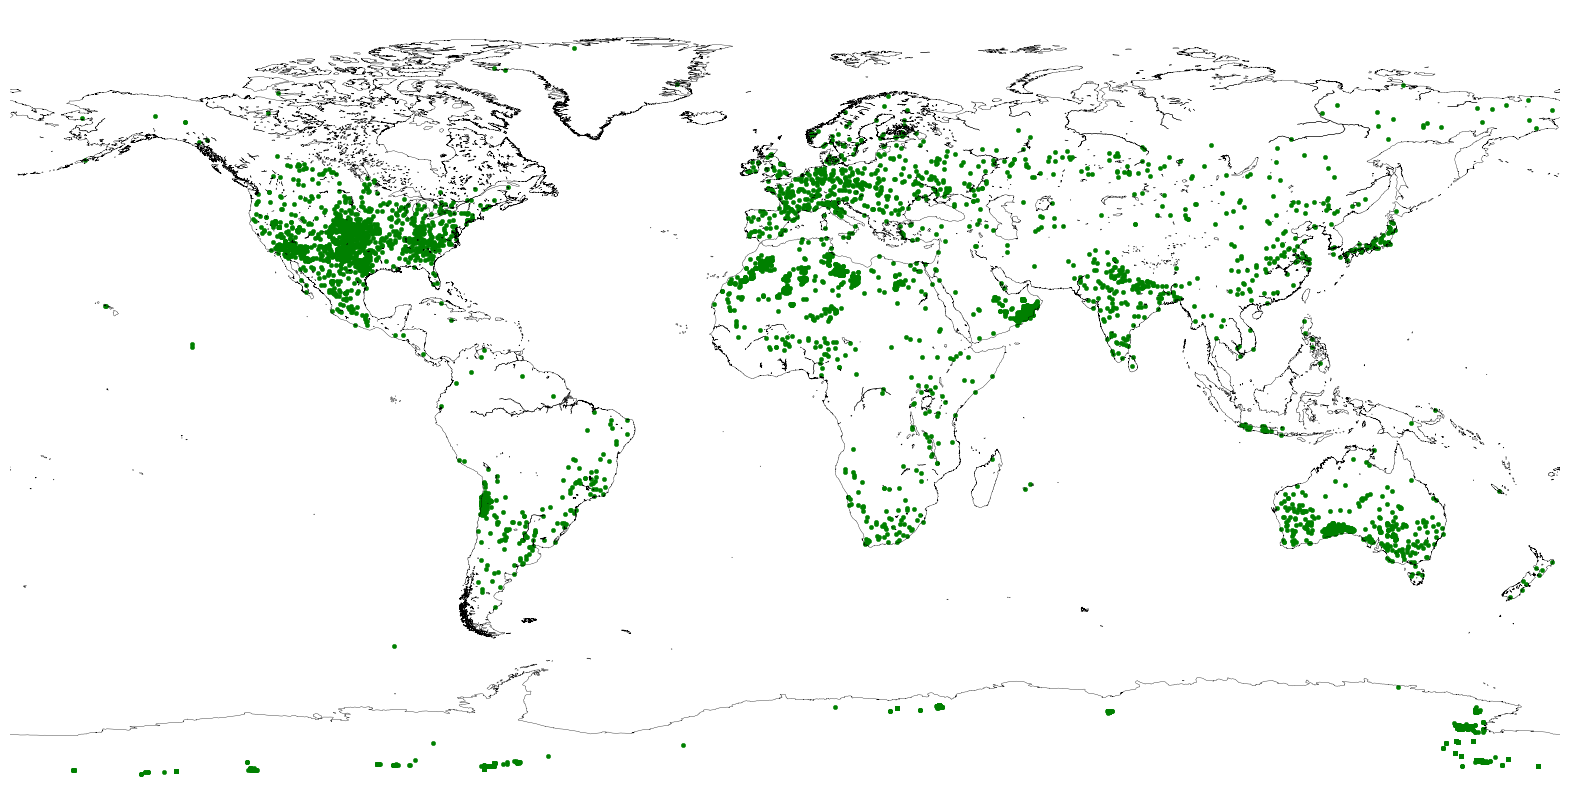

In [7]:
#This code is from the previous workshop and i made some changes
#https://github.com/mmeagher/ARC6818/blob/master/workshops/workshop%205.ipynb
#plot all the meteorites noticed in the world
fig = plt.figure(figsize=(20, 14))
markersize =40 # cotrols the size of dots
markertype = '.' # the shape of the points
markercolor = 'green'#the color of the dots
markeralpha = 1  #transparency
#Plot with Equidistant Cylindrical Projection,the coordinates are the boundaries of the map
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='i') 
m.drawcoastlines(linewidth=0.25)
# Avoid border around map.
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
# Convert locations to x/y coordinates and plot them as dots.
x, y = m(df.reclong.values, df.reclat.values)
m.scatter(x, y, markersize, marker=markertype, color=markercolor, alpha=markeralpha)
plt.show()

## CREATE DIFFERENT GROUPS FOR EACH PERIOD AND PLOT MAPS

### divide the time into centuries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 678 to 678
Data columns (total 10 columns):
name           1 non-null object
id             1 non-null int64
nametype       1 non-null object
recclass       1 non-null object
mass           0 non-null float64
fall           1 non-null object
year           1 non-null float64
reclat         1 non-null float64
reclong        1 non-null float64
GeoLocation    1 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 88.0+ bytes


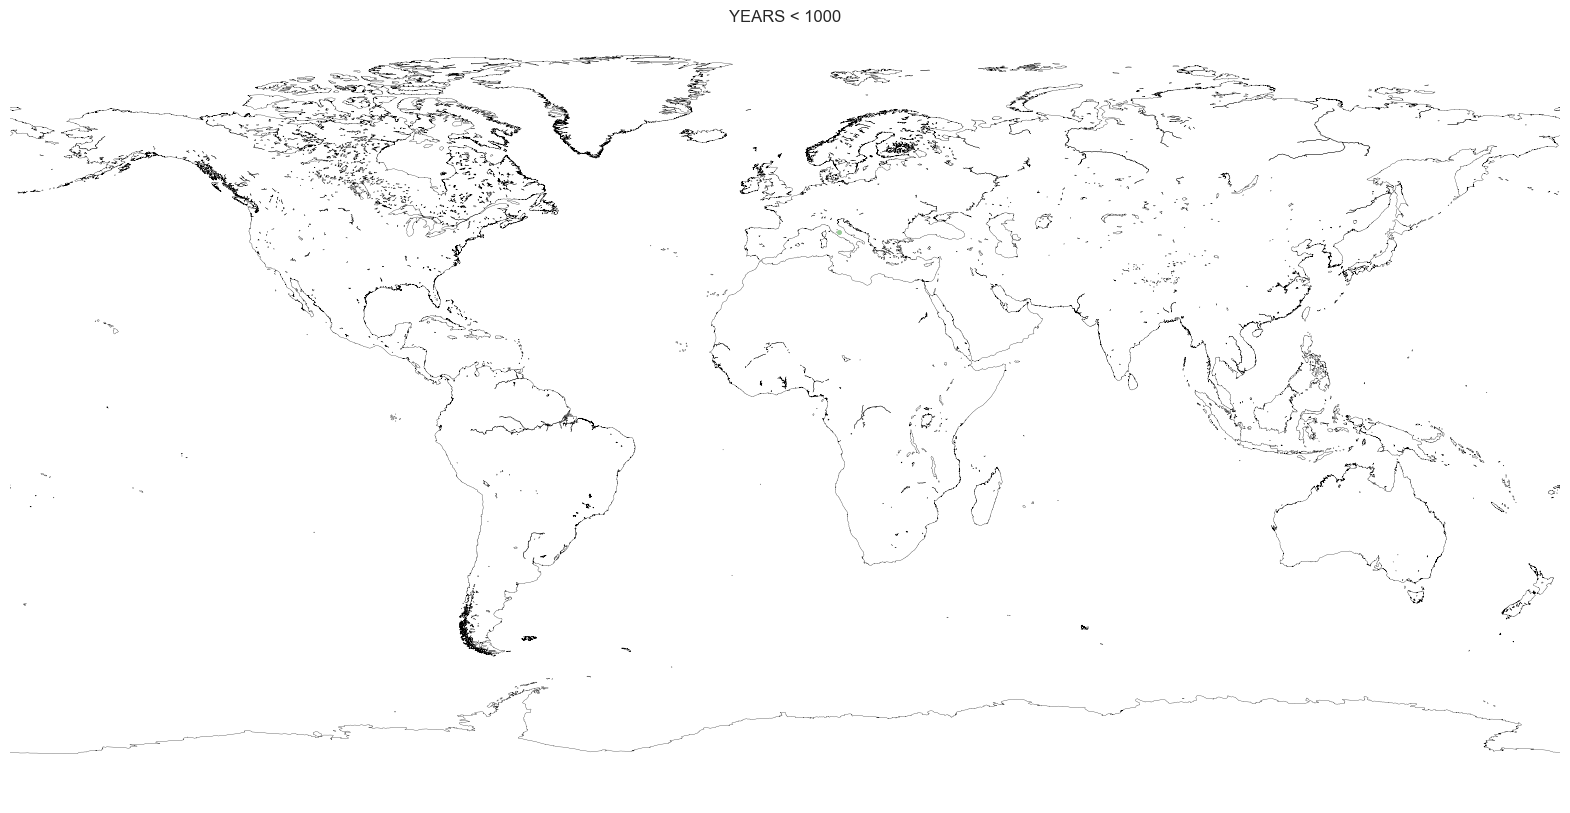

In [8]:
####creat new df with year records under 1000
dfY1=df[df.year<1000]
dfY1.info()
#plot world map of the new df
fig = plt.figure(figsize=(20, 14))
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='i') 
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
plt.title("YEARS < 1000")
x1,y1=m(dfY1.reclong.values, dfY1.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color="green", alpha=.4)
plt.show()

In [9]:
### create new df which contains rows that year is between 1000-1100 , 1100-1200 , 1200-1300
#create new df which contains rows that year is between 1000 and 1100
dfY2=df[df.year>1000]
dfY2=dfY2[dfY2.year<1100]
dfY2.info()
#create new df which contains rows that year is between 1100 and 1200
dfY3=df[df.year>1100]
dfY3=dfY3[dfY3.year<1200]
dfY3.info()
#create new df which contains rows that year is between 1200 and 1300
dfY3=df[df.year>1200]
dfY3=dfY3[dfY3.year<1300]
dfY3.info()
#there are no meteorites noticed during these three period

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
name           0 non-null object
id             0 non-null int64
nametype       0 non-null object
recclass       0 non-null object
mass           0 non-null float64
fall           0 non-null object
year           0 non-null float64
reclat         0 non-null float64
reclong        0 non-null float64
GeoLocation    0 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 0.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
name           0 non-null object
id             0 non-null int64
nametype       0 non-null object
recclass       0 non-null object
mass           0 non-null float64
fall           0 non-null object
year           0 non-null float64
reclat         0 non-null float64
reclong        0 non-null float64
GeoLocation    0 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 0.0+ bytes
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 278 to 278
Data columns (total 10 columns):
name           1 non-null object
id             1 non-null int64
nametype       1 non-null object
recclass       1 non-null object
mass           1 non-null float64
fall           1 non-null object
year           1 non-null float64
reclat         1 non-null float64
reclong        1 non-null float64
GeoLocation    1 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 88.0+ bytes


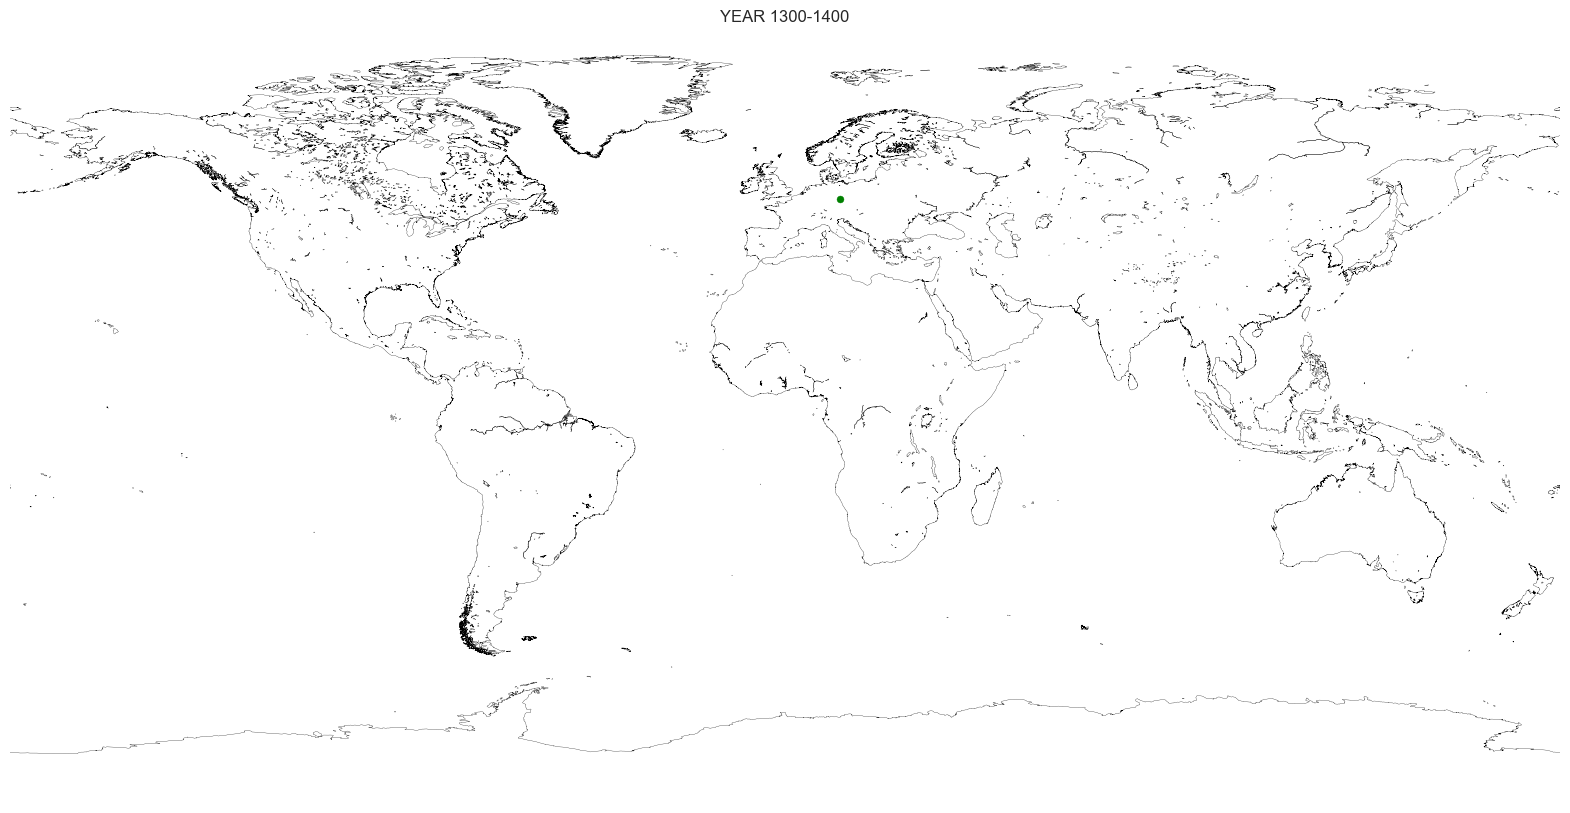

In [10]:
### create new df which contains rows that year is between 1300 and 1400
dfY5=df[df.year>1300]
dfY5=dfY5[dfY5.year<1400]
dfY5.info()
#plot world map of the dfY5
fig = plt.figure(figsize=(20, 14))
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='i') 
m.drawcoastlines(linewidth=0.2)
markersize = 100
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
plt.title("YEAR 1300-1400")
x1,y1=m(dfY5.reclong.values, dfY5.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color="green", alpha=1)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 283 to 1040
Data columns (total 10 columns):
name           3 non-null object
id             3 non-null int64
nametype       3 non-null object
recclass       3 non-null object
mass           2 non-null float64
fall           3 non-null object
year           3 non-null float64
reclat         3 non-null float64
reclong        3 non-null float64
GeoLocation    3 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 264.0+ bytes


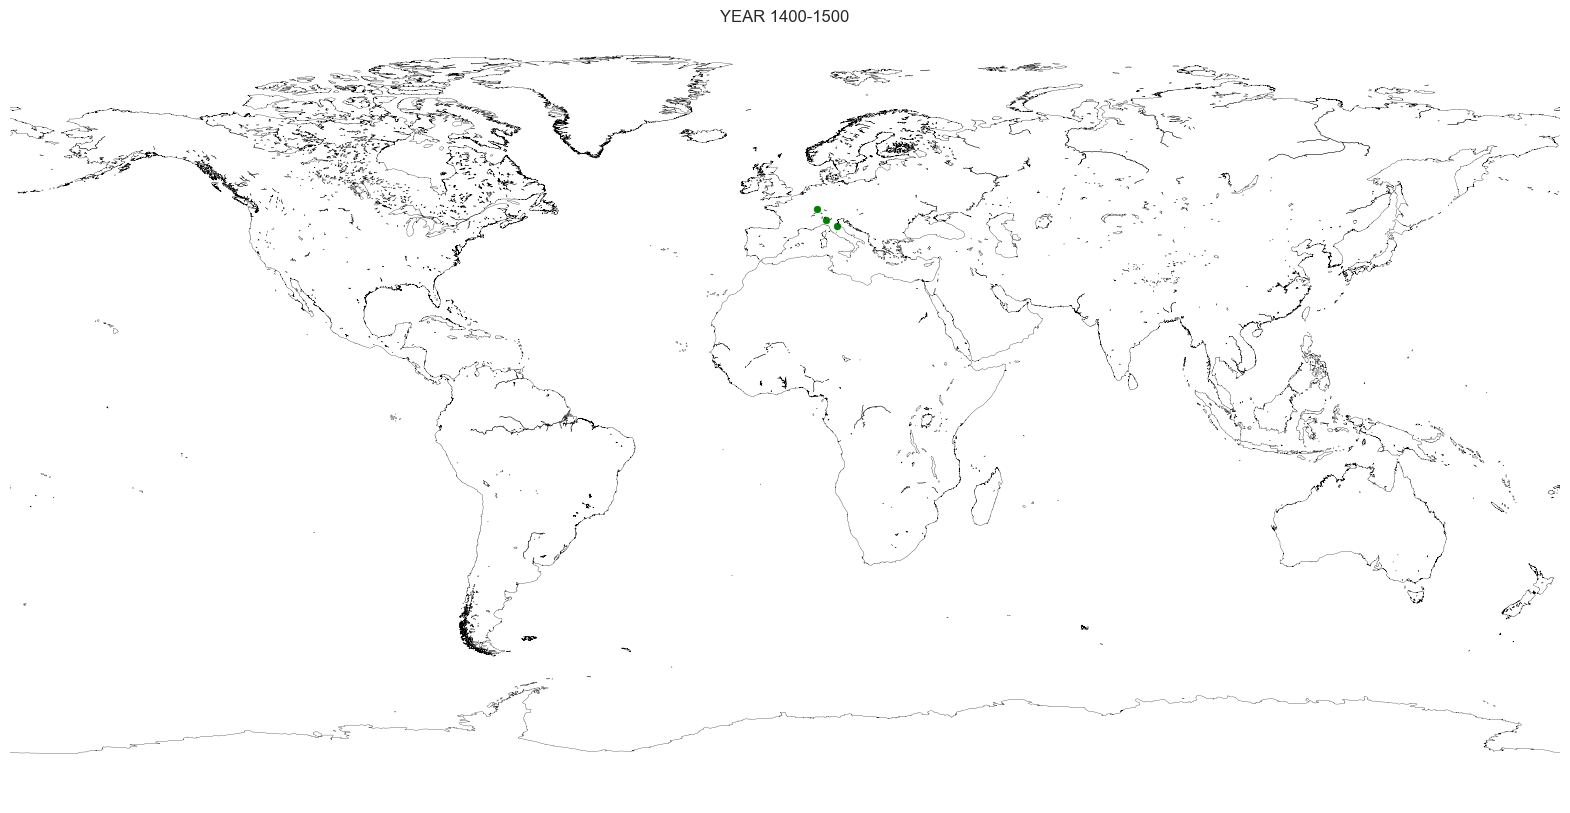

In [11]:
### create new df which contains rows that year is between 1400 and 1500
dfY6=df[df.year>1400]
dfY6=dfY6[dfY6.year<1500]
dfY6.info()
fig = plt.figure(figsize=(20, 14))
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='i') 
m.drawcoastlines(linewidth=0.2)
markersize = 100
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
plt.title("YEAR 1400-1500")
x1,y1=m(dfY6.reclong.values, dfY6.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color="green", alpha=1)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 174 to 5329
Data columns (total 10 columns):
name           3 non-null object
id             3 non-null int64
nametype       3 non-null object
recclass       3 non-null object
mass           2 non-null float64
fall           3 non-null object
year           3 non-null float64
reclat         3 non-null float64
reclong        3 non-null float64
GeoLocation    3 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 264.0+ bytes


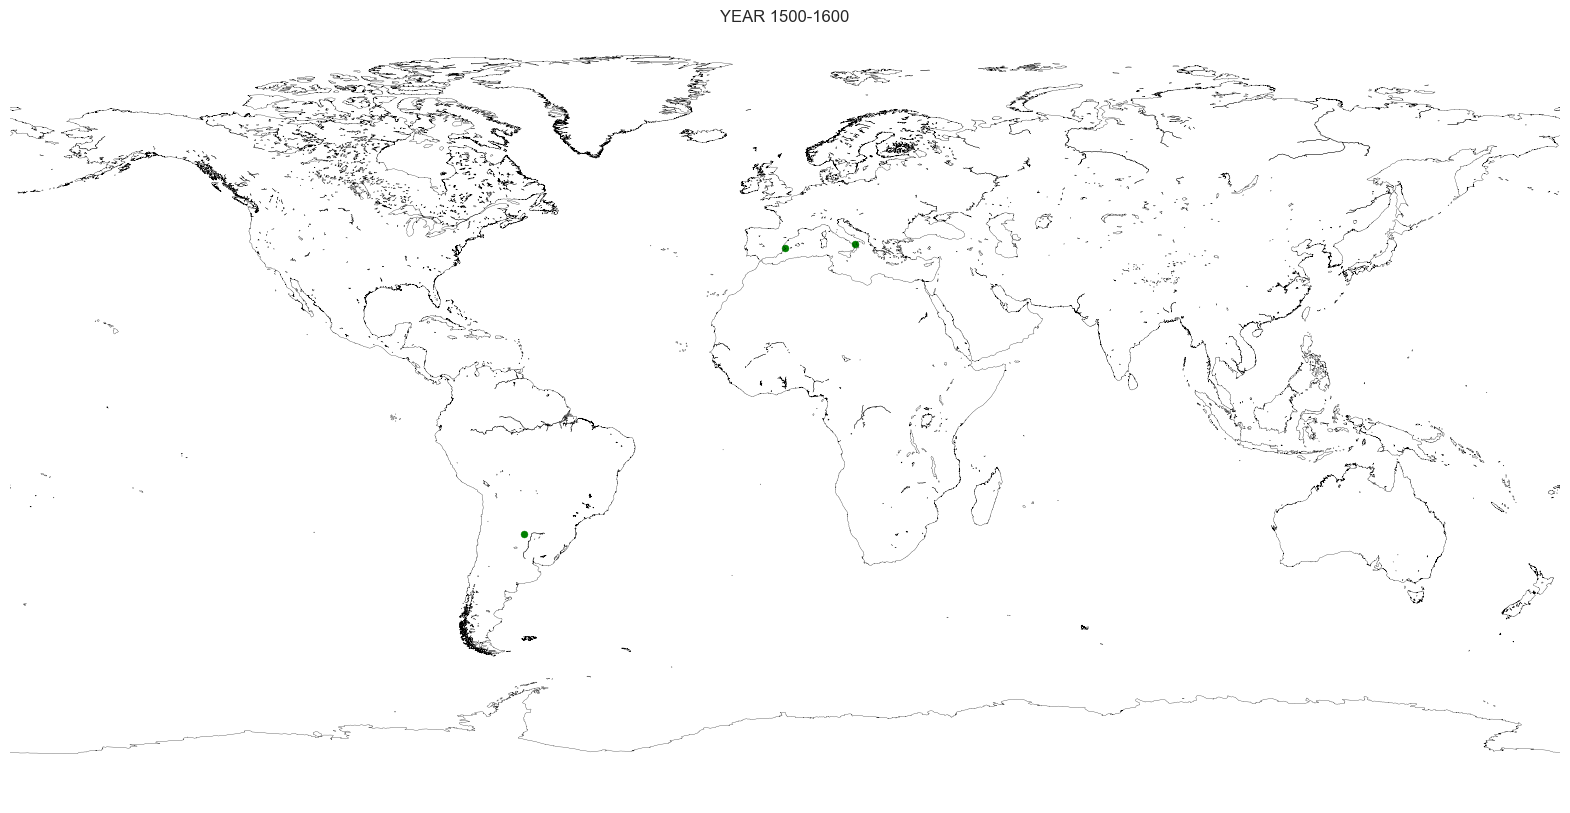

In [12]:
### create new df which contains rows that year is between 1500 and 1600
dfY7=df[df.year>1500]
dfY7=dfY7[dfY7.year<1600]
dfY7.info()
fig = plt.figure(figsize=(20, 14))
#plot pfY7
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='i')
m.drawcoastlines(linewidth=0.2)
markersize = 100
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
plt.title("YEAR 1500-1600")
x1,y1=m(dfY7.reclong.values, dfY7.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color="green", alpha=1)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 312 to 1037
Data columns (total 10 columns):
name           12 non-null object
id             12 non-null int64
nametype       12 non-null object
recclass       12 non-null object
mass           8 non-null float64
fall           12 non-null object
year           12 non-null float64
reclat         12 non-null float64
reclong        12 non-null float64
GeoLocation    12 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 1.0+ KB


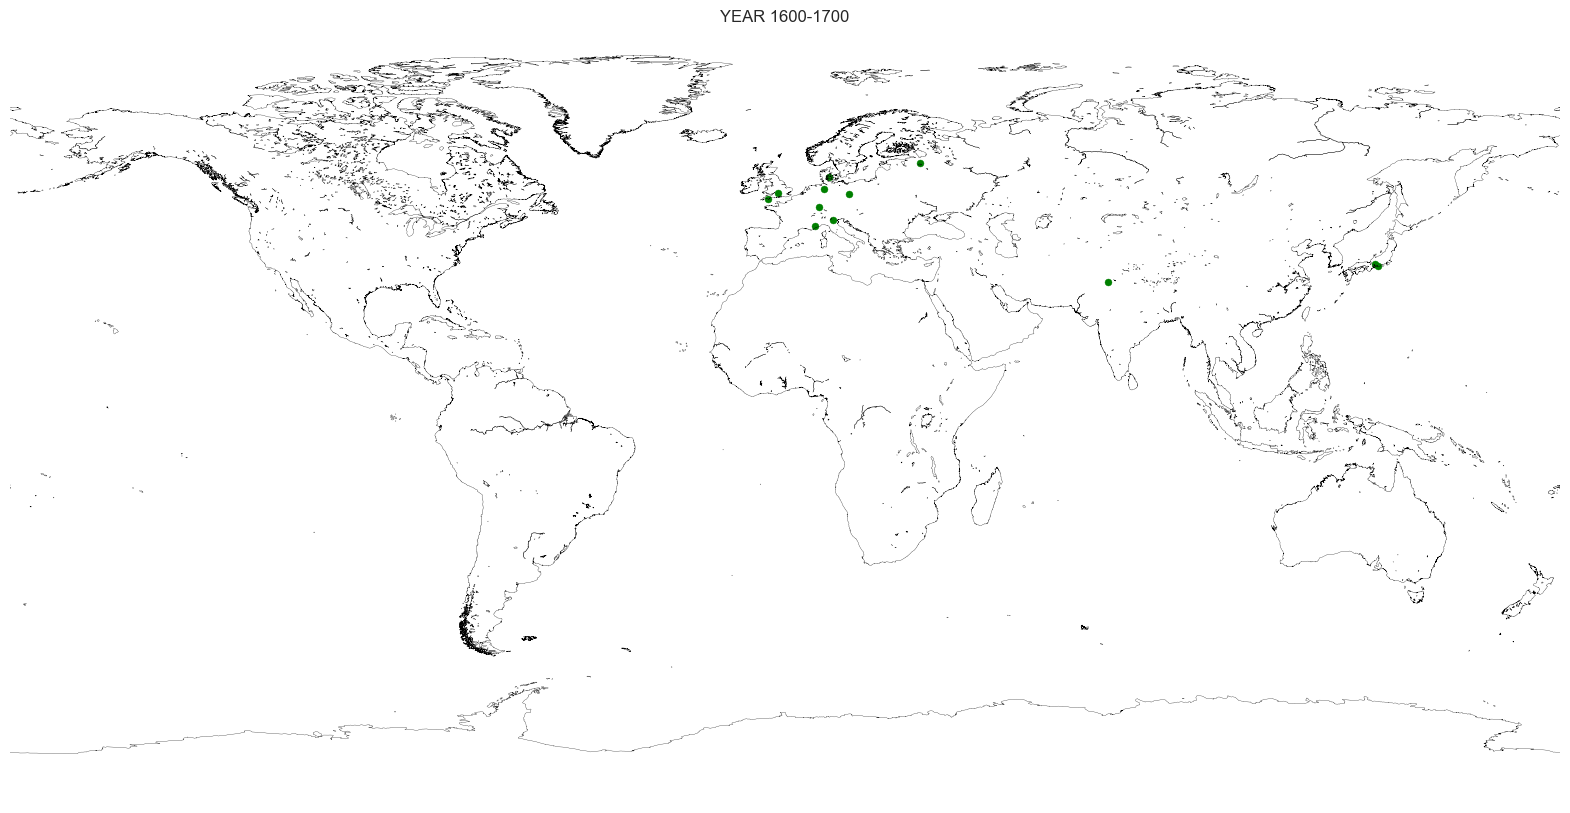

In [13]:
### create new df which contains rows that year is between 1600 and 1700
dfY8=df[df.year>1600]
dfY8=dfY8[dfY8.year<1700]
dfY8.info()
#plot dfY8
fig = plt.figure(figsize=(20, 14))
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='i')
m.drawcoastlines(linewidth=0.2)
markersize = 100
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
plt.title("YEAR 1600-1700")
x1,y1=m(dfY8.reclong.values, dfY8.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color="green", alpha=1)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 12 to 45691
Data columns (total 10 columns):
name           38 non-null object
id             38 non-null int64
nametype       38 non-null object
recclass       38 non-null object
mass           32 non-null float64
fall           38 non-null object
year           38 non-null float64
reclat         38 non-null float64
reclong        38 non-null float64
GeoLocation    38 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 3.3+ KB


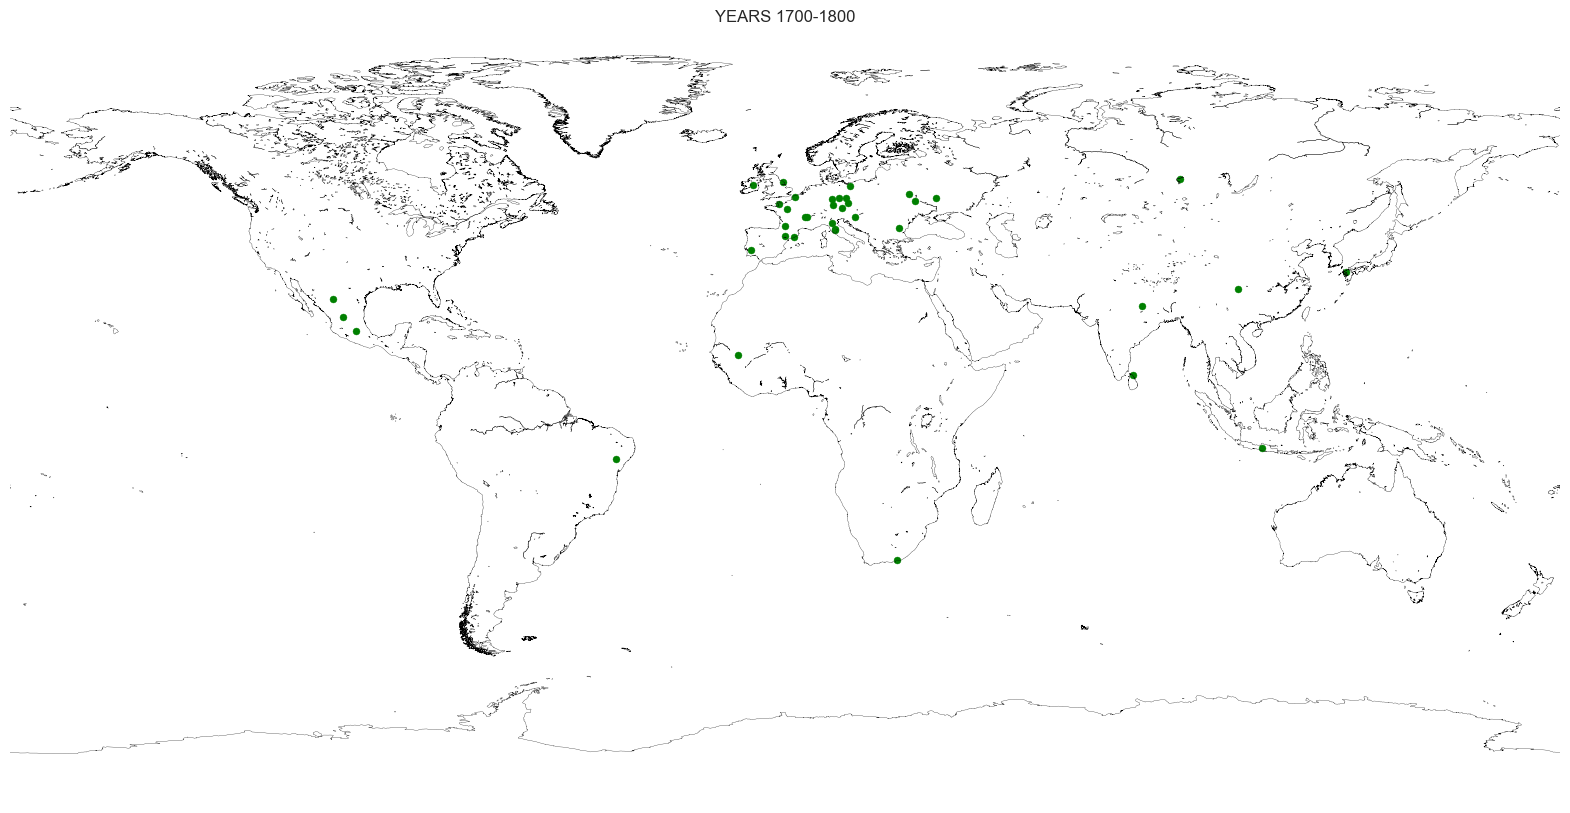

In [14]:
### create new df which contains rows that year is between 1700 and 1800
dfY9=df[df.year>1700]
dfY9=dfY9[dfY9.year<1800]
dfY9.info()
#plot dfY9
fig = plt.figure(figsize=(20, 14))
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='i')
m.drawcoastlines(linewidth=0.2)
markersize = 100
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
plt.title("YEARS 1700-1800")
x1,y1=m(dfY9.reclong.values, dfY9.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color="green", alpha=1)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 45684
Data columns (total 10 columns):
name           663 non-null object
id             663 non-null int64
nametype       663 non-null object
recclass       663 non-null object
mass           659 non-null float64
fall           663 non-null object
year           663 non-null float64
reclat         663 non-null float64
reclong        663 non-null float64
GeoLocation    663 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 57.0+ KB


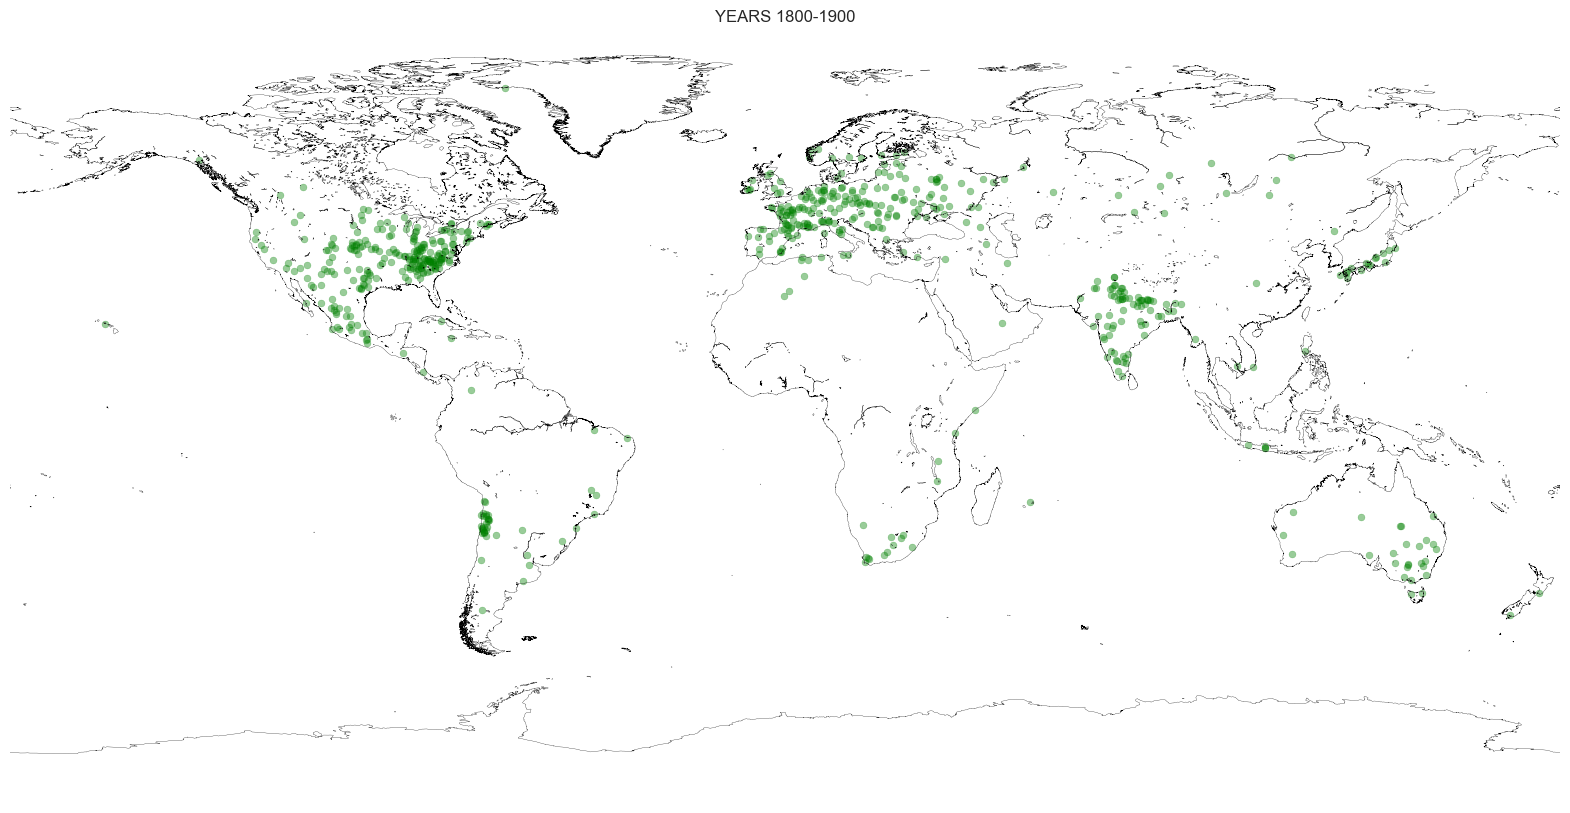

In [15]:
### create new df which contains rows that year is between 1800 and 1900
dfY10=df[df.year>1800]
dfY10=dfY10[dfY10.year<1900]
dfY10.info()
#plot dfY10
fig = plt.figure(figsize=(20, 14))
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='i')
m.drawcoastlines(linewidth=0.2)
markersize = 100
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
plt.title("YEARS 1800-1900")
x1,y1=m(dfY10.reclong.values, dfY10.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color="green", alpha=.4)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22157 entries, 1 to 45715
Data columns (total 10 columns):
name           22157 non-null object
id             22157 non-null int64
nametype       22157 non-null object
recclass       22157 non-null object
mass           22083 non-null float64
fall           22157 non-null object
year           22157 non-null float64
reclat         22157 non-null float64
reclong        22157 non-null float64
GeoLocation    22157 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


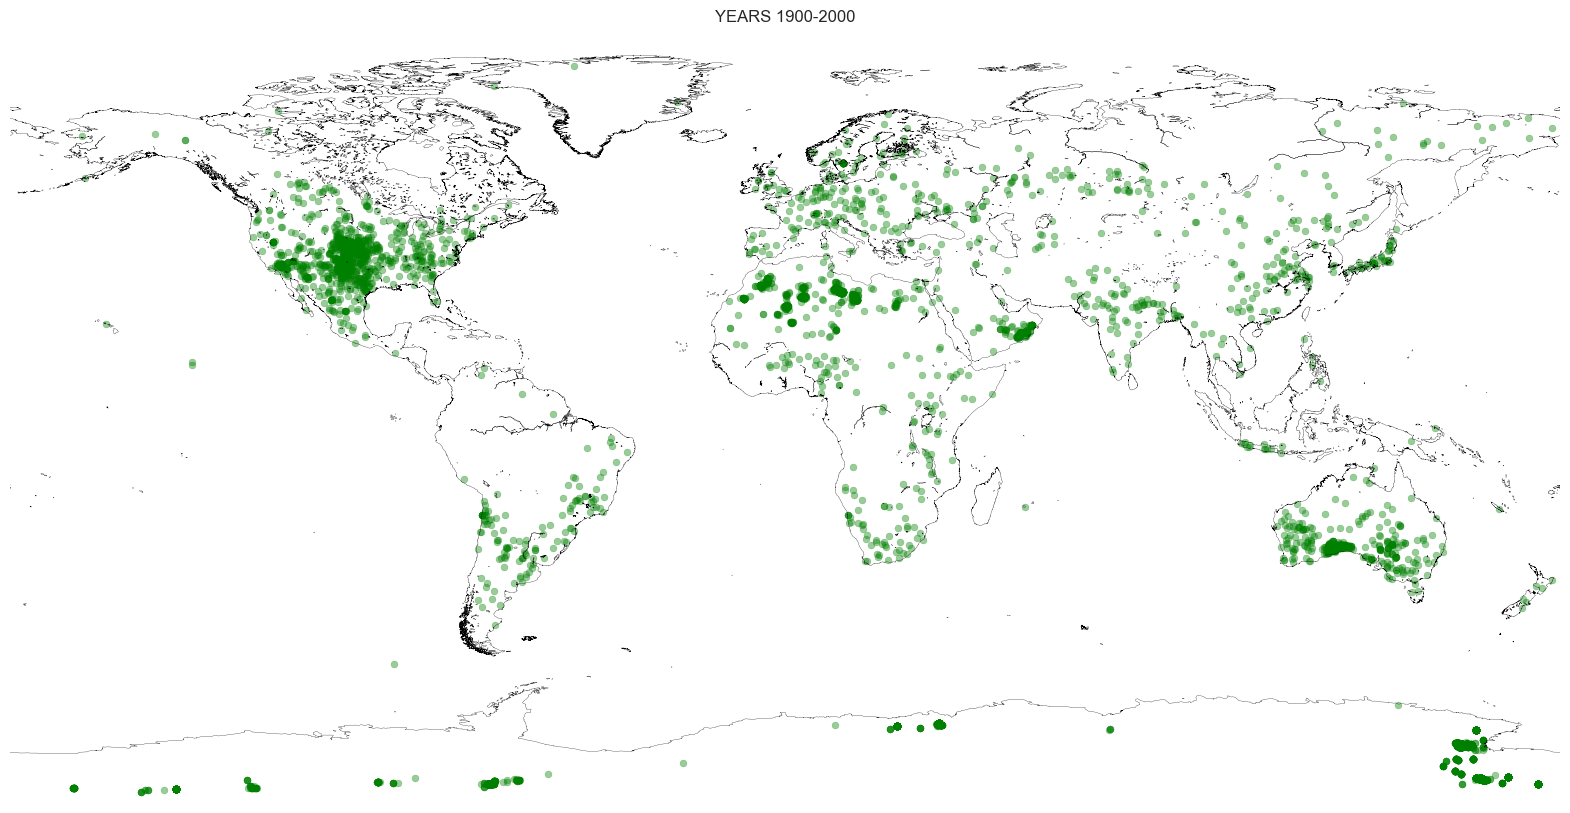

In [16]:
### create new df which contains rows that year is between 1800 and 1900
dfY11=df[df.year>1900]
dfY11=dfY11[dfY11.year<2000]
dfY11.info()
#plot dfY11
fig = plt.figure(figsize=(20, 14))
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='i')
m.drawcoastlines(linewidth=0.2)
markersize = 100
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
plt.title("YEARS 1900-2000")
x1,y1=m(dfY11.reclong.values, dfY11.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color="green", alpha=.4)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7411 entries, 18 to 45714
Data columns (total 10 columns):
name           7411 non-null object
id             7411 non-null int64
nametype       7411 non-null object
recclass       7411 non-null object
mass           7405 non-null float64
fall           7411 non-null object
year           7411 non-null float64
reclat         7411 non-null float64
reclong        7411 non-null float64
GeoLocation    7411 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 636.9+ KB


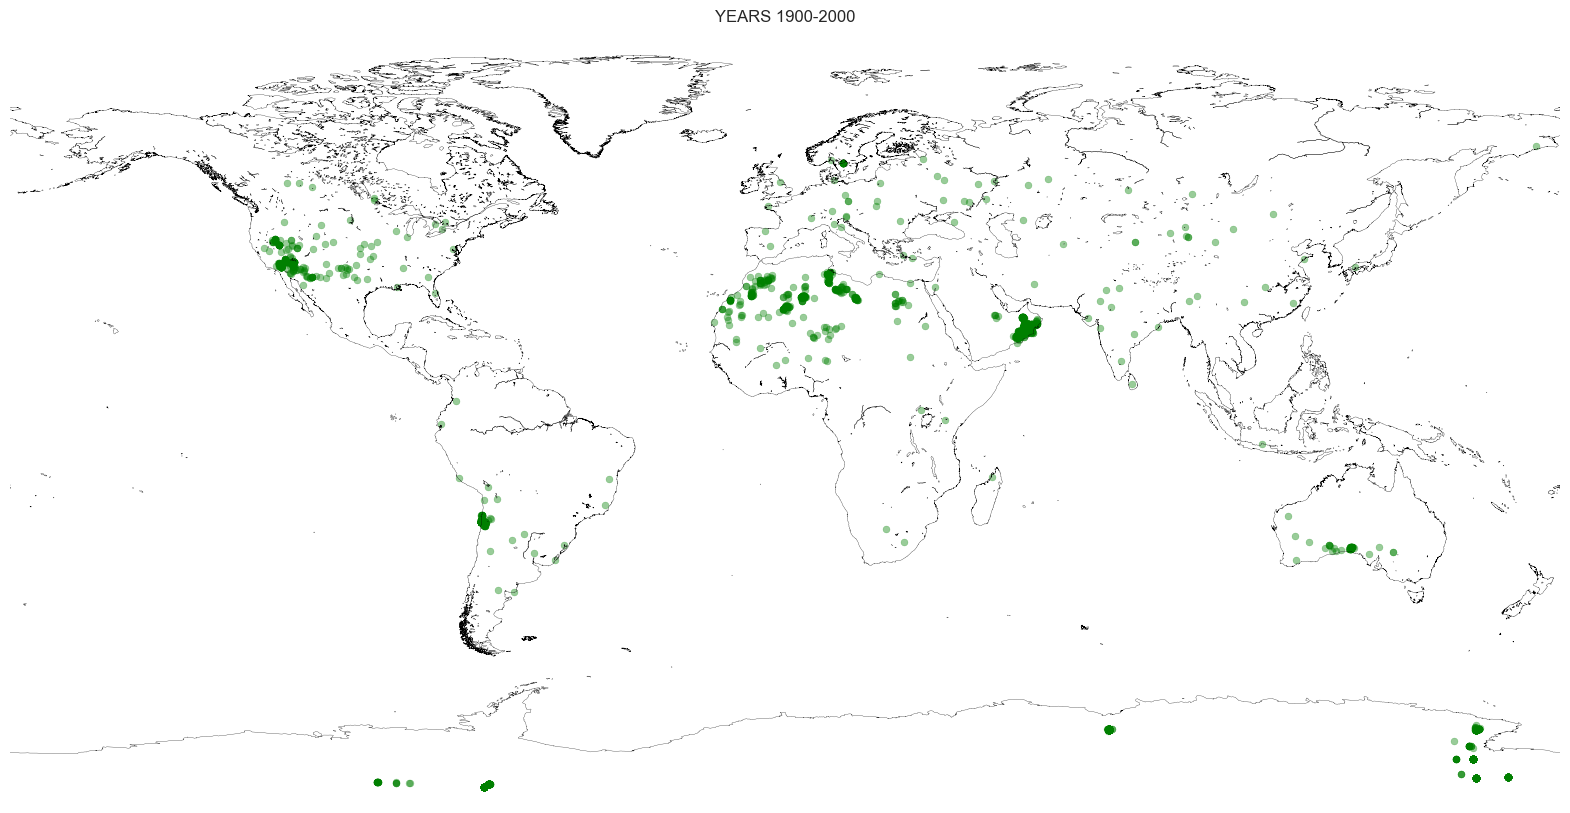

In [17]:
### create new df which contains rows that year is after 2000
dfY12=df[df.year>2000]
dfY12.info()
#plot dfY12
fig = plt.figure(figsize=(20, 14))
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='i')
m.drawcoastlines(linewidth=0.2)
markersize = 100
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
plt.title("YEARS 1900-2000")
x1,y1=m(dfY12.reclong.values, dfY12.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color="green", alpha=.4)
plt.show()

### Histograms explaining the relationship described to the maps above _ divided to centuries

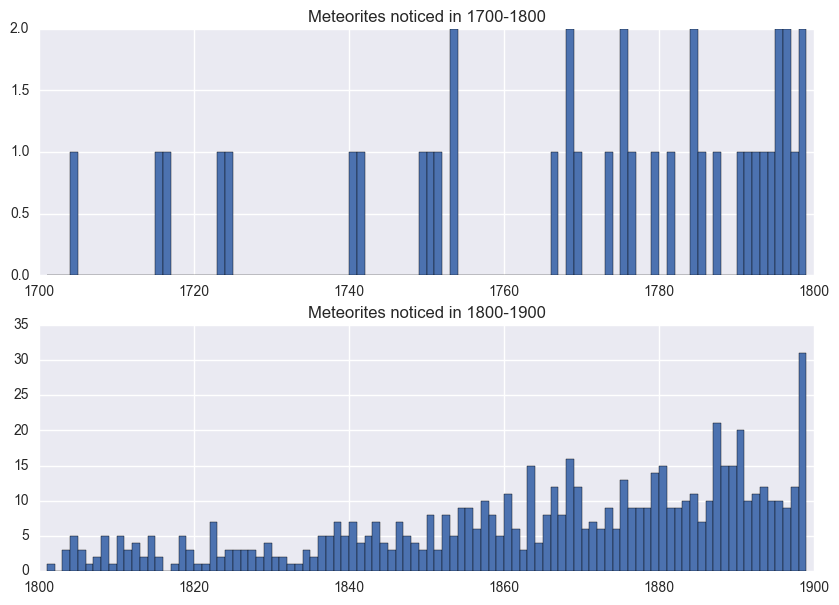

In [18]:
plt.subplot(211)#This function creates a figure and a grid of subplots with a single call, while
#providing reasonable control over how the individual plots are created.
dfY9.year.hist(bins=np.arange(1700,1800,1),figsize=(10,7))# (1700,1800,1) the range of years and 1 is the step and thickness of each bar
plt.title('Meteorites noticed in 1700-1800')
plt.xlim(1700,1800) # sets out the basis of histogram
plt.subplot(212)
dfY10.year.hist(bins=np.arange(1800,1900,1),figsize=(10,7))
plt.title('Meteorites noticed in 1800-1900')
plt.xlim(1800,1900)
plt.show()

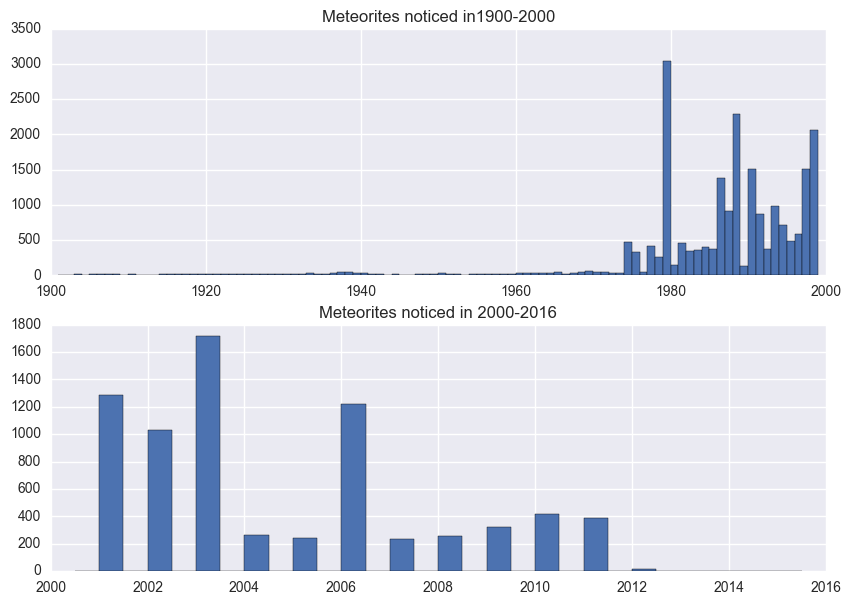

In [19]:
plt.subplot(211)
dfY11.year.hist(bins=np.arange(1900,2000,1),figsize=(10,7))
plt.title('Meteorites noticed in1900-2000')
plt.xlim(1900,2000)
plt.subplot(212)
dfY12.year.hist(bins=np.arange(2000,2016,0.5),figsize=(10,7))
plt.title('Meteorites noticed in 2000-2016')
plt.xlim(2000,2016)
plt.show()

## Outcome: In general the conclusion of the analysis above is that US and Europe is mainly affected by Meteorites and as time passes these phenomena are more perceptible. There is a huge increase of noticed meteorites starting around 1970

### Map illustrating meteorites in the different years

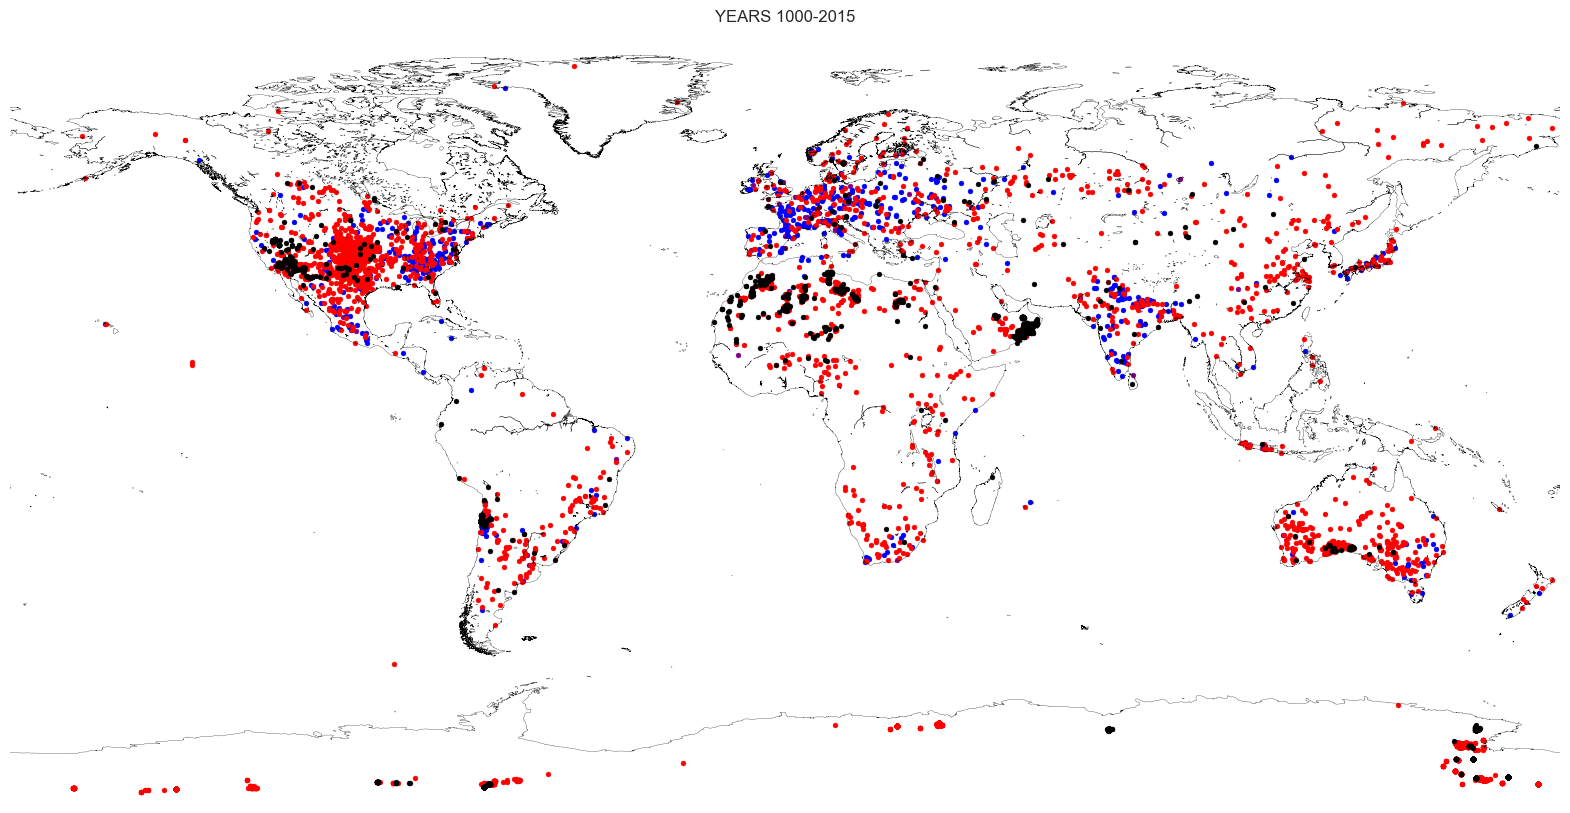

In [20]:
fig = plt.figure(figsize=(20, 14))
markersize = 100
markertype = '.'
markeralpha = 1
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='i')
m.drawcoastlines(linewidth=0.2)
markersize = 50
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
plt.title("YEARS 1000-2015")
x1,y1 = m(dfY1.reclong.values, dfY1.reclat.values)
x5,y5=m(dfY5.reclong.values, dfY5.reclat.values)
x6,y6=m(dfY6.reclong.values, dfY6.reclat.values)
x7,y7=m(dfY7.reclong.values, dfY7.reclat.values)
x8,y8=m(dfY8.reclong.values, dfY8.reclat.values)
x9,y9=m(dfY9.reclong.values, dfY9.reclat.values)
x10,y10=m(dfY10.reclong.values, dfY10.reclat.values)
x11,y11=m(dfY11.reclong.values, dfY11.reclat.values)
x12,y12=m(dfY12.reclong.values, dfY12.reclat.values)
m.scatter(x1, y1, markersize, marker=markertype, color='#900000', alpha=markeralpha)
m.scatter(x5, y5, markersize, marker=markertype, color='#800000', alpha=markeralpha)
m.scatter(x6, y6, markersize, marker=markertype, color='#700000', alpha=markeralpha)
m.scatter(x7, y7, markersize, marker=markertype, color='#600000', alpha=markeralpha)
m.scatter(x8, y8, markersize, marker=markertype, color='#500000', alpha=markeralpha)
m.scatter(x9, y9, markersize, marker=markertype, color='purple', alpha=markeralpha)
m.scatter(x10, y10, markersize, marker=markertype, color='blue', alpha=markeralpha)
m.scatter(x11, y11, markersize, marker=markertype, color="red", alpha=markeralpha)
m.scatter(x12, y12, markersize, marker=markertype, color='black', alpha=markeralpha)
plt.show()

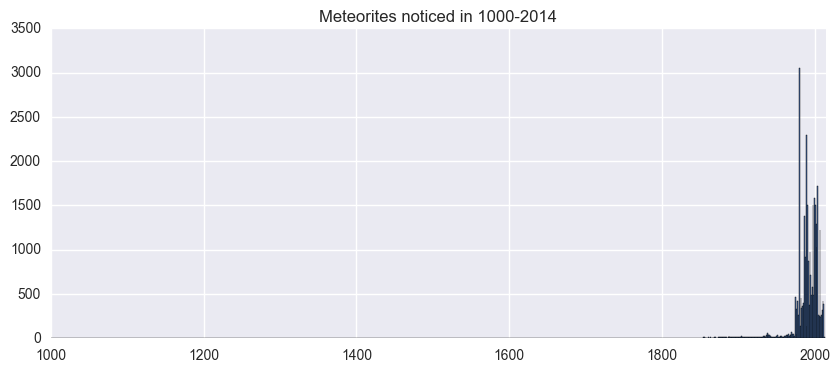

In [21]:
df.year.hist(bins=np.arange(1000,2014,1),figsize=(10,4))
plt.title('Meteorites noticed in 1000-2014')
plt.xlim(1000,2014)
plt.show()

### Outcome: As we have noticed in the previous bar-charts the notification of meteorites increased dramatically around 2000. Also, we can see from the map that between 1800 and 1900 more meteorites fell to Europe and that between 1900 and 2000 meteorites were fallen widely to the earth with a perceptible condensation of the phenomenon in the US

### apply different colour to "found" and "fell" , by creating a new column and replacing values with colours and plot that map

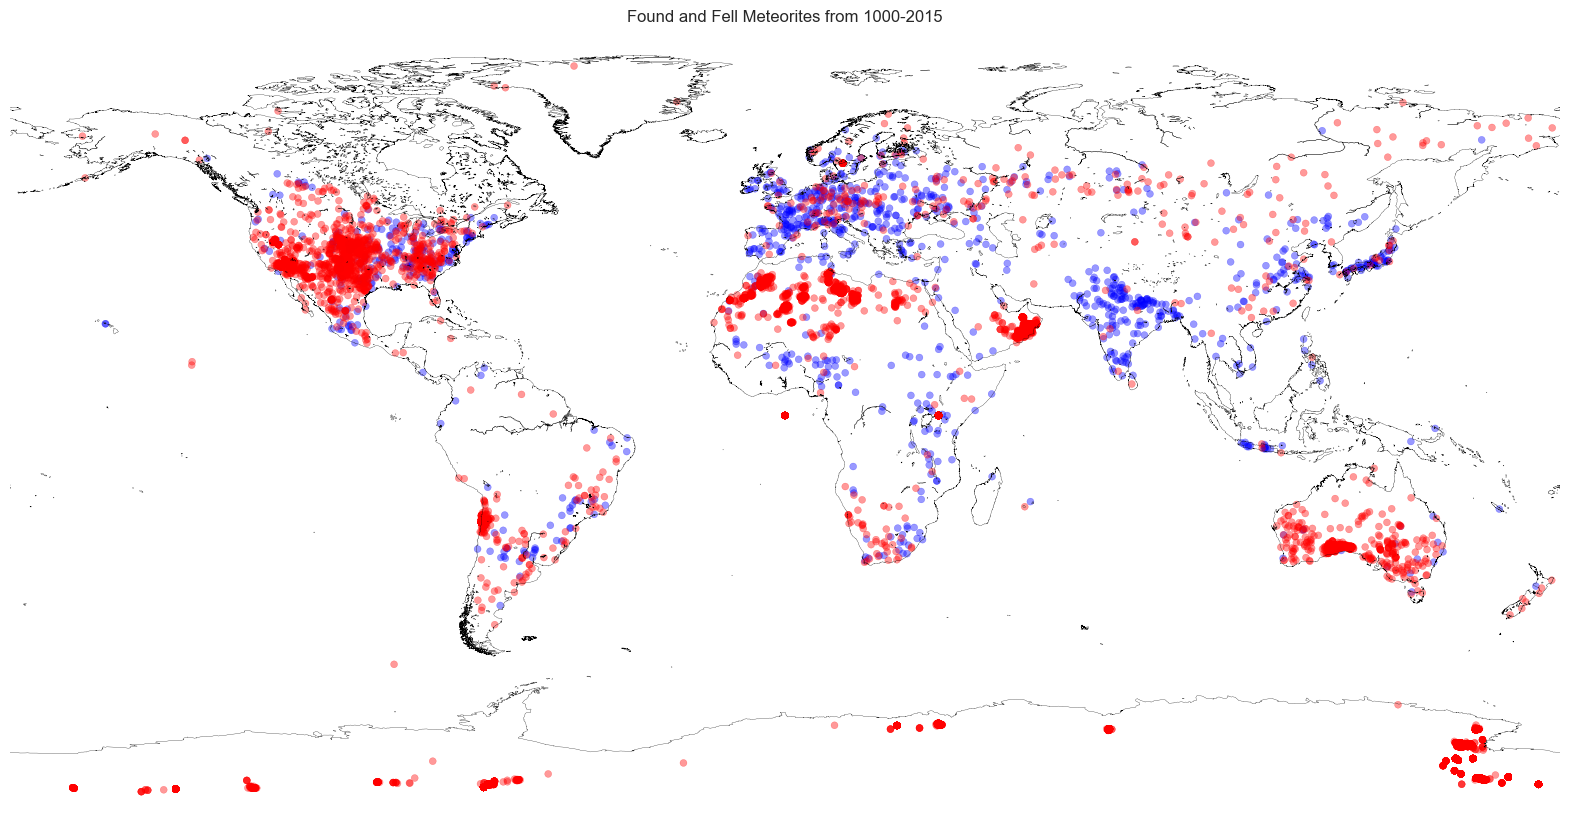

In [22]:
#create a new dataframe with particular columns
df2= pd.read_csv('Mlandings.csv', usecols=['reclat', 'reclong', 'fall','year','recclass','mass'])
df2.dropna(axis=0, how='any', inplace=True)   #delete all rows that contain an null value
#apply different colour
df2['Colors'] = df2['fall'] # rename the list and change the attribute
df2.Colors= df2.Colors.replace({"Found": "red" ,"Fell":"blue"}, regex=True) 
#plot the map based on df2 records
fig = plt.figure(figsize=(20, 14))
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='i')
m.drawcoastlines(linewidth=0.2)
markersize = 100
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
plt.title("Found and Fell Meteorites from 1000-2015")
x1,y1=m(df2.reclong.values, df2.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color= df2.Colors, alpha=.4)
plt.show()

## Map of found and Fell meteorites according to their mass

In [23]:
#Group the lists according to fell and Found meteorites
#We need to have them separetly to manipulate better the next atribute which is mass
dffell = df.groupby('fall').get_group('Fell')
dffound = df.groupby('fall').get_group('Found')

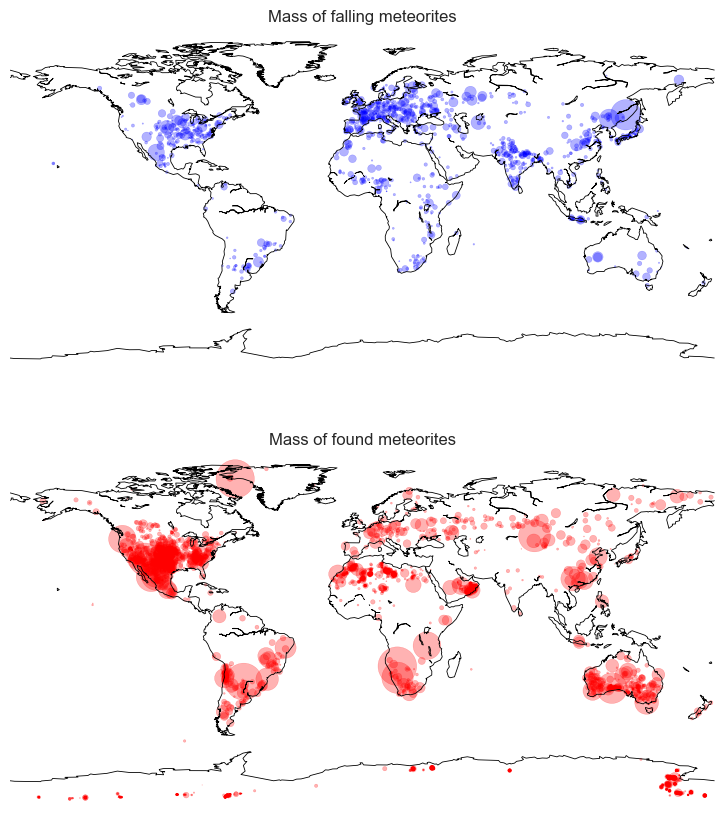

In [24]:
#Plot the map  as we did previously, we use again subplot to plot 2 maps at the same time
#We use the dffell and dffound that we created before
plt.figure(figsize=(20,10))
plt.subplot(211)
m=Basemap(projection='cyl')
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
m.drawcoastlines(linewidth=0.6)
m.scatter(dffell.reclong,dffell.reclat,s=np.sqrt(dffell.mass/100),alpha=0.3,color='blue') # np.sqrt command gives an 
#array of the same shape as x, containing the positive square-root of each element in x
#by using this command we keep the ratio of meteorites' size in the plot
plt.title('Mass of falling meteorites')
plt.subplot(212)
m = Basemap(projection='cyl')
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
m.drawcoastlines(linewidth=0.6)
m.scatter(dffound.reclong,dffound.reclat,s=np.sqrt(dffound.mass/100), alpha=0.3,color='red')
plt.title('Mass of found meteorites')
plt.show()

### Outcome: As we can see from the two maps above, meteorites are found more frequently in US and Australia and are more frequently just noticed in Europe

# Part  02
# Zoom to US region 

### As we saw Us is mainly affected from meteorites and due to this event in the next part I zoom in to US. After finding the coordinates of the map's boundary box I brought them in to create the new map

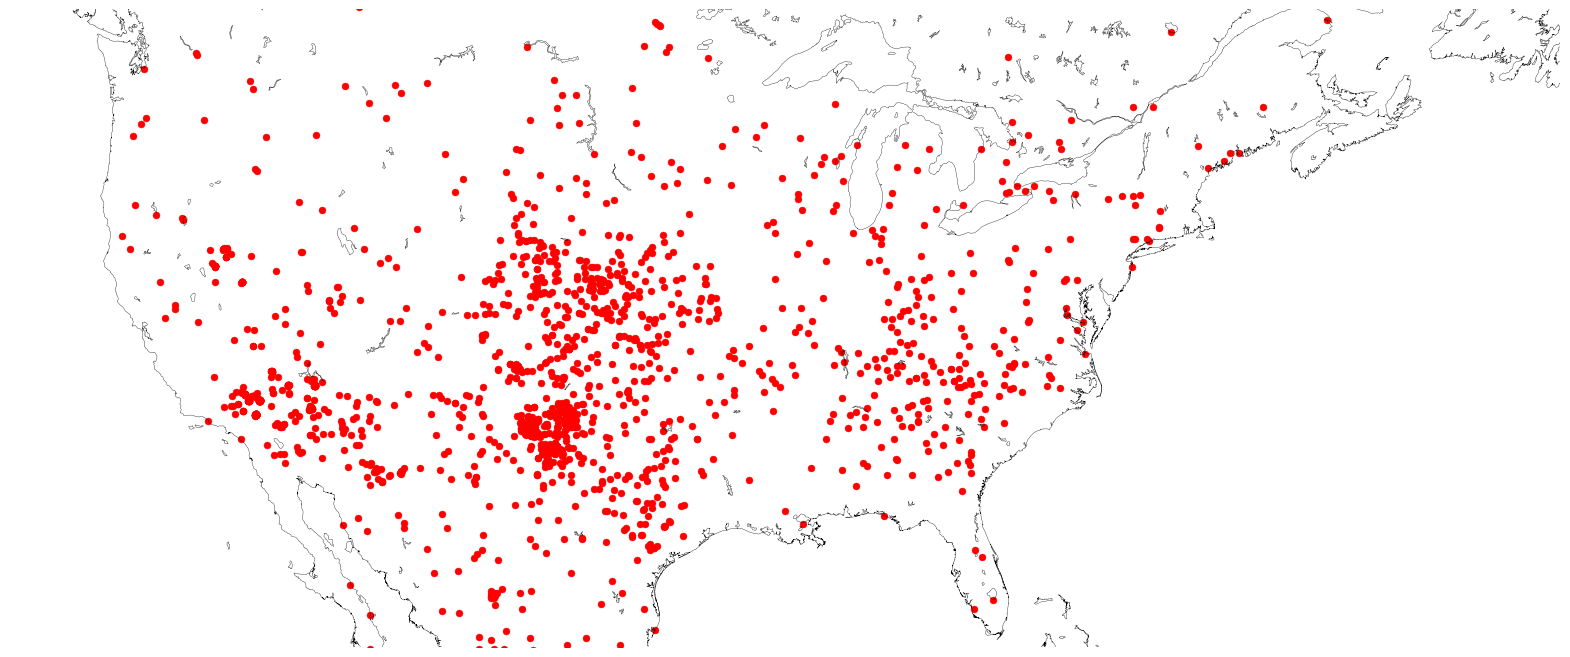

In [25]:
#This code is from previous class workshop and i made some changes
#https://github.com/mmeagher/ARC6818/blob/master/workshops/workshop%205.ipynb
#After zooming in US region, we first plot a map of all the recorded  meteorites.
fig = plt.figure(figsize=(20, 14))
markersize =100
markertype = '.'
markercolor = 'red'
markeralpha = 1
m = Basemap(resolution='i',projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=-129., llcrnrlat= 24.6, urcrnrlon=-53., urcrnrlat=49.2)  #usefull site to find coordinates to zoom in(boundaries) http://boundingbox.klokantech.com
m.drawcoastlines(linewidth=0.25)
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
x, y = m(df.reclong.values, df.reclat.values)
m.scatter(x, y, markersize, marker=markertype, color=markercolor, alpha=markeralpha)
plt.show()

### US Fell and found meteorites

### in this part the previous maps is taken as a basis but in this case meteorites are divided into fell and found.The found meteorites are illustrated with red colour and the fell with blue.

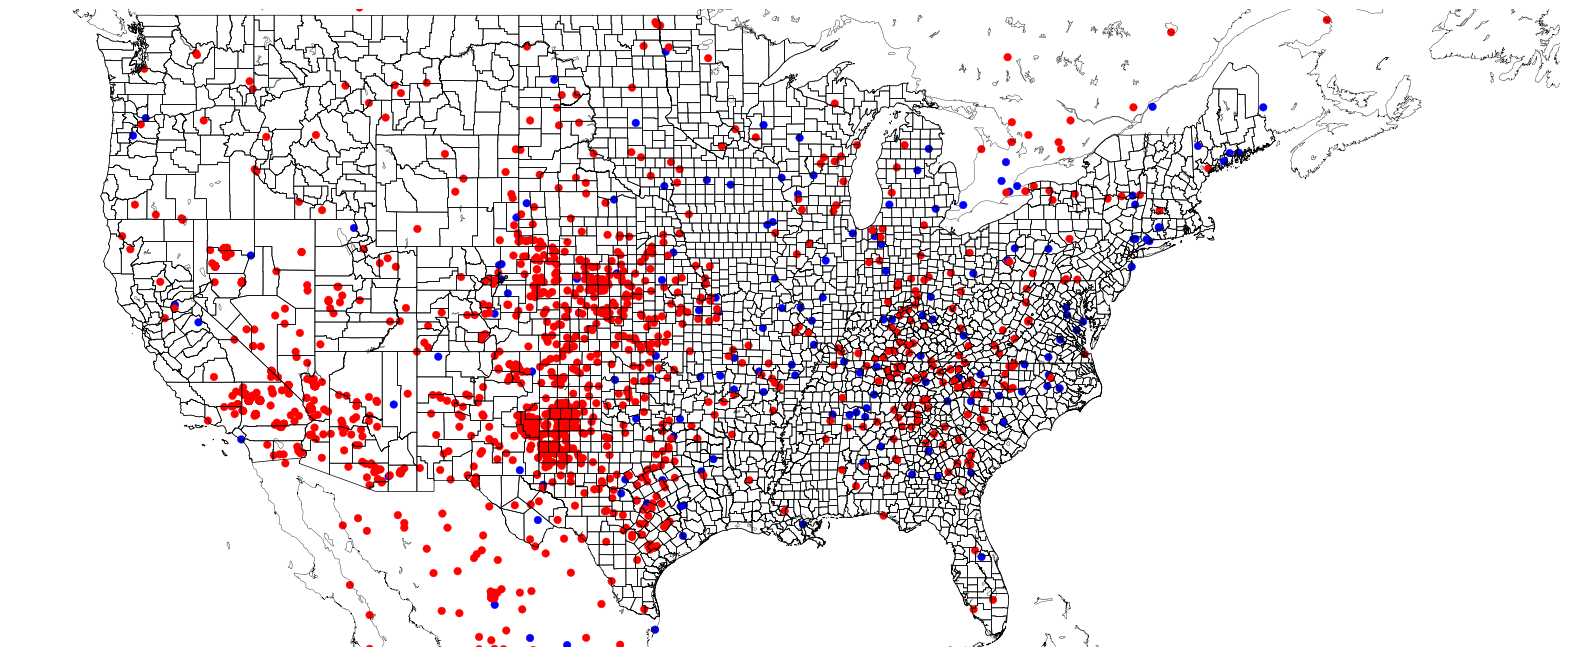

In [26]:
#In this map i brought in a shape file that shows how the contry is devided into regions and where the regions are 
#bigger or smaller
#source of shapefile:https://www.census.gov/geo/maps-data/data/cbf/cbf_counties.html
fig = plt.figure(figsize=(20, 14))
markersize =120
markertype = '.'
markercolor = 'red'
markeralpha = 1
m = Basemap(resolution='i', # c, l, i, h, f or None, merc=Mercator Projection
            projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=-129., llcrnrlat= 24.6, urcrnrlon=-53., urcrnrlat=49.2)
m.drawcoastlines(linewidth=0.25)
# Avoid border around map.
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
# Convert locations to x/y coordinates and plot them as dots.
x1,y1=m(df2.reclong.values, df2.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color= df2.Colors, alpha=1)
m.readshapefile('cb_2015_us_county_500k', 'cb_2015_us_county_500k')
plt.show()

###  Bring in the second dataset which is Hurricanes,1851-2014   source :  http://www.mapcruzin.com/natural-disaster-shapefiles/hurricane-arcgis-shapefile-download.htm

In [27]:
#first we read the shape file and analyse it in order to understand what kind of lists are included.

In [28]:
## because this hurricane shapefile refers to atlandic ocean, in the next map I zoom out in order to have a larger view
#of the see
#Then I change the structure of meteorites shapefile in order to take the records that refer to period between 1851 and 
#2014 in order to be the same with Hurricanes and Tropical scale cyclones data
dfYH=df[df.year>1851]
dfYH=dfYH[dfYH.year<2004]
#apply different colour
dfYH['Colors'] = dfYH['fall'] #Do the same process as before but for the new dfYH
dfYH.Colors= dfYH.Colors.replace({"Found": "red" ,"Fell":"blue"}, regex=True) 
dfYH.Colors.value_counts()
#import shapefile
import shapefile
sf = shapefile.Reader("huralll020.shp")
myshp = open("huralll020.shp", "rb")
mydbf = open("huralll020.shp", "rb")

In [29]:
#prit the length
shapes = sf.shapes()
len(shapes)

37706

In [30]:
#see the field names,Field type,Field length
fields = sf.fields
fields

[('DeletionFlag', 'C', 1, 0),
 ['FNODE_', 'N', 9, 0],
 ['TNODE_', 'N', 9, 0],
 ['LPOLY_', 'N', 9, 0],
 ['RPOLY_', 'N', 9, 0],
 ['LENGTH', 'F', 13, 11],
 ['HURALLL020', 'N', 9, 0],
 ['YEAR', 'N', 4, 0],
 ['MONTH', 'N', 2, 0],
 ['DAY', 'N', 2, 0],
 ['BTID', 'N', 5, 0],
 ['NAME', 'C', 25, 0],
 ['LONG', 'N', 16, 7],
 ['LAT', 'N', 16, 7],
 ['WIND_KTS', 'N', 5, 1],
 ['PRESSURE', 'N', 5, 0],
 ['WIND_MPH', 'N', 5, 1],
 ['CATEGORY', 'C', 3, 0]]

In [31]:
#choose a record to see an example of inside information
records = sf.records()
records[40]

[0,
 0,
 0,
 0,
 '7.81025e-001',
 41,
 1851,
 8,
 22,
 4,
 'NOT NAMED',
 -85.5,
 25.6,
 80.0,
 0,
 90.0,
 'H1']

In [32]:
#The first Map is an abstract map illustrates the relationship of fell and found meteorites with hurricane category >4,<4 
#and tropical cyclones.So it has all the information but due to black background Us map is not visibe

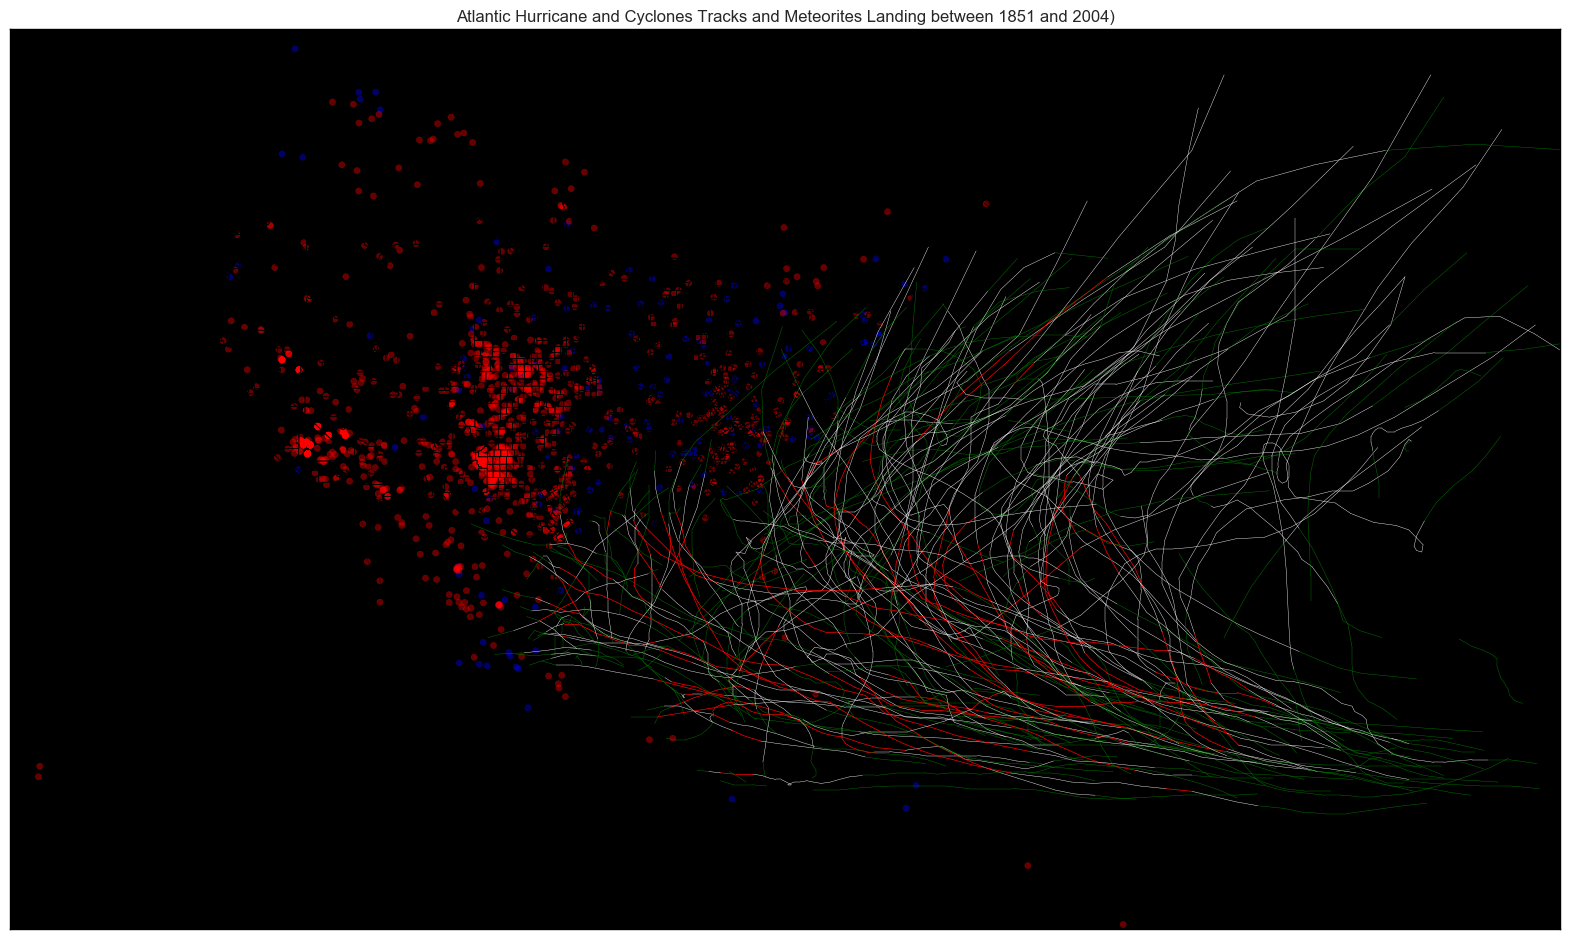

In [37]:
#PLOT found nd fell from 1851-2004
##code base on http://matplotlib.org/basemap/users/examples.html. My add in this piece of code is the connection with
## the meteorites data and the TS category which was not analysed. 
fig = plt.figure(figsize=(20, 14))
markersize =80
markertype = 'x'
markercolor = 'red'
markeralpha = 1
m = Basemap(llcrnrlon=-140.,llcrnrlat=0.,urcrnrlon=-20.,urcrnrlat=57.,
            projection='merc',lat_1=20.,lat_2=40.,lon_0=-30.,
            resolution ='l',area_thresh=1000.)

# Convert locations to x/y coordinates and plot them as dots.
x1,y1=m(dfYH.reclong.values, dfYH.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color= dfYH.Colors, alpha=.4)
#read shapefile that creates US regions,for better understanding of place
m.readshapefile('cb_2015_us_county_500k', 'cb_2015_us_county_500k')
#read shapefile in order to input hurricane data 
shp_info = m.readshapefile('huralll020','hurrtracks',drawbounds=False)
# find names of storms that reached Cat 4.
names = []
for shapedict in m.hurrtracks_info:
    cat = shapedict['CATEGORY']
    name = shapedict['NAME']
    if cat in ['H4','H5'] and name not in names:
        # only use named storms.
        if name != 'NOT NAMED':  names.append(name)
# plot tracks of those storms.
for shapedict,shape in zip(m.hurrtracks_info,m.hurrtracks):
    name = shapedict['NAME']
    cat = shapedict['CATEGORY']
    if name in names:
        xx,yy = zip(*shape)
        # show part of track where storm > Cat 4 as red.
        if cat in ['H4','H5']:
            m.plot(xx,yy,linewidth=0.5,color='red')
        # show part of track where storm < Cat 4 as white.
        if cat in ['H1','H2','H3']:
            m.plot(xx,yy,linewidth=0.3,color='white')
        # show part of track where storm are tropical scale.
        if cat in ["TS"]:
            m.plot(xx,yy,linewidth=0.3,color='green')
# draw coastlines, meridians and parallels.
m.drawcoastlines(linewidth=0.25)
m.drawcountries()
m.drawmapboundary(fill_color='black')
plt.title('Atlantic Hurricane and Cyclones Tracks and Meteorites Landing between 1851 and 2004)')
plt.show() 

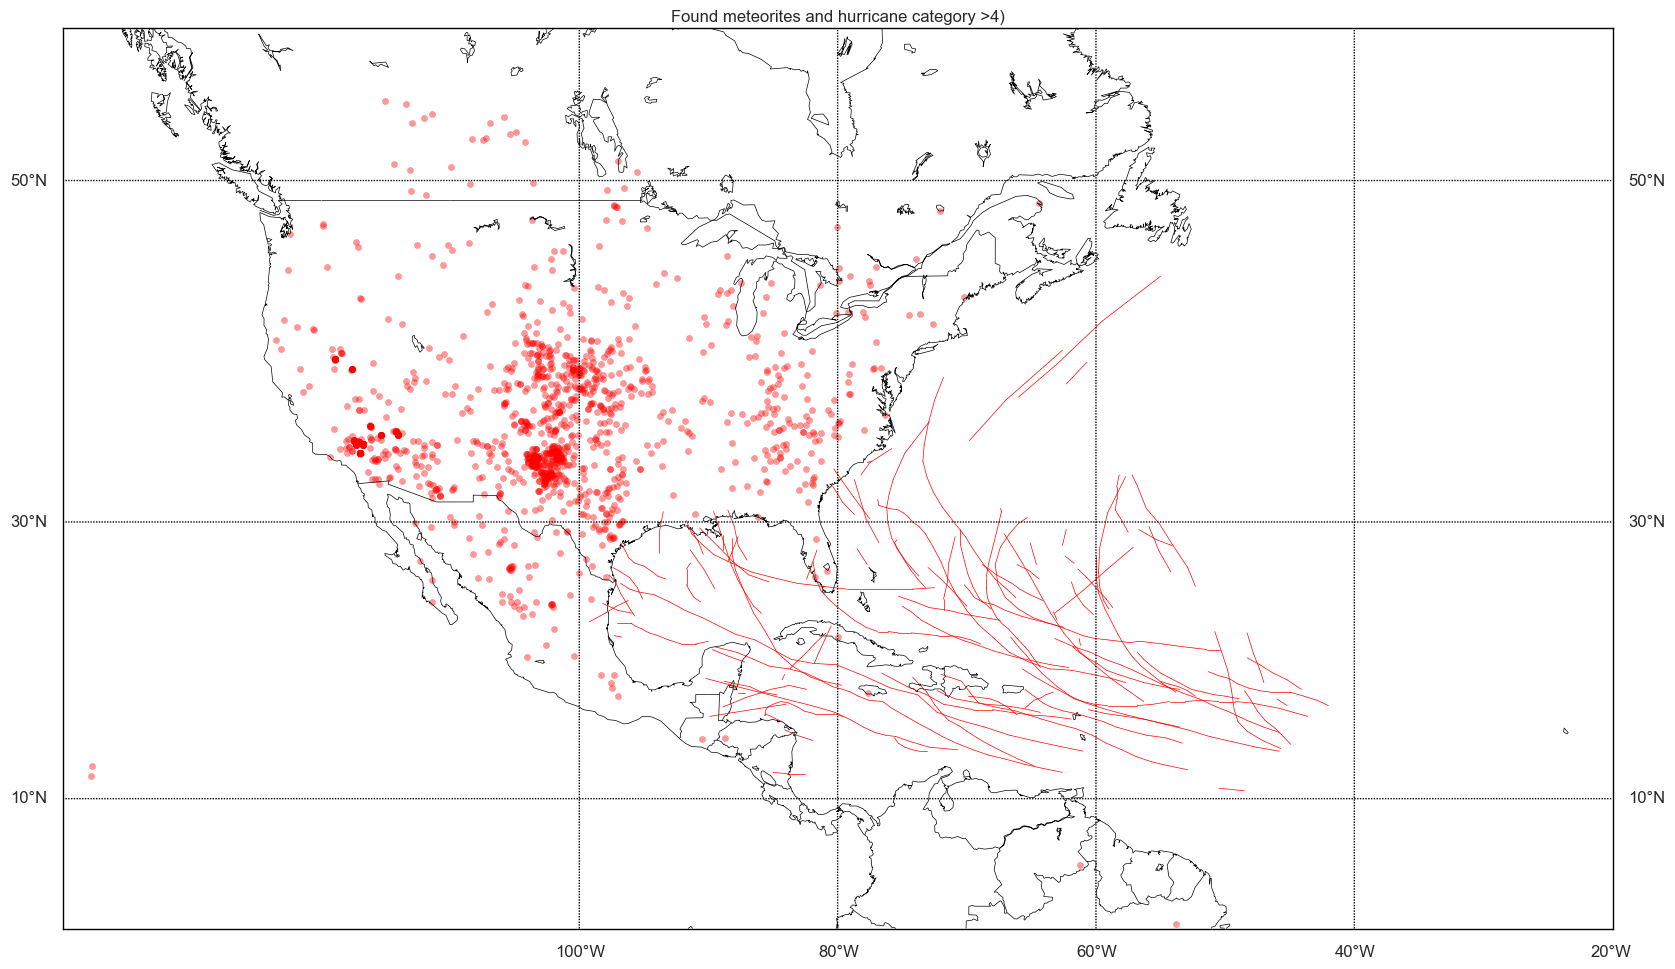

In [34]:
dfYL= dfYH[dfYH.fall == "Found"]
fig = plt.figure(figsize=(20, 14))
markersize =80
markertype = 'x'
markercolor = 'red'
markeralpha = .4
m = Basemap(llcrnrlon=-140.,llcrnrlat=0.,urcrnrlon=-20.,urcrnrlat=57.,
            projection='merc',lat_1=20.,lat_2=40.,lon_0=-30.,
            resolution ='l',area_thresh=1000.)

# Convert locations to x/y coordinates and plot them as dots.
x1,y1=m(dfYL.reclong.values, dfYL.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color= "red", alpha=.4)
#read shapefile in order to input hurricane data 
shp_info = m.readshapefile('huralll020','hurrtracks',drawbounds=False)
# find names of storms that reached Cat 4.
names = []
for shapedict in m.hurrtracks_info:
    cat = shapedict['CATEGORY']
    name = shapedict['NAME']
    if cat in ['H4','H5'] and name not in names:
        # only use named storms.
        if name != 'NOT NAMED':  names.append(name)
# plot tracks of those storms.
for shapedict,shape in zip(m.hurrtracks_info,m.hurrtracks):
    name = shapedict['NAME']
    cat = shapedict['CATEGORY']
    if name in names:
        xx,yy = zip(*shape)
        # show part of track where storm > Cat 4 as red.
        if cat in ['H4','H5']:
            m.plot(xx,yy,linewidth=0.5,color='red')
# draw coastlines, meridians and parallels.
m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
plt.title('Found meteorites and hurricane category >4)')
plt.show() 

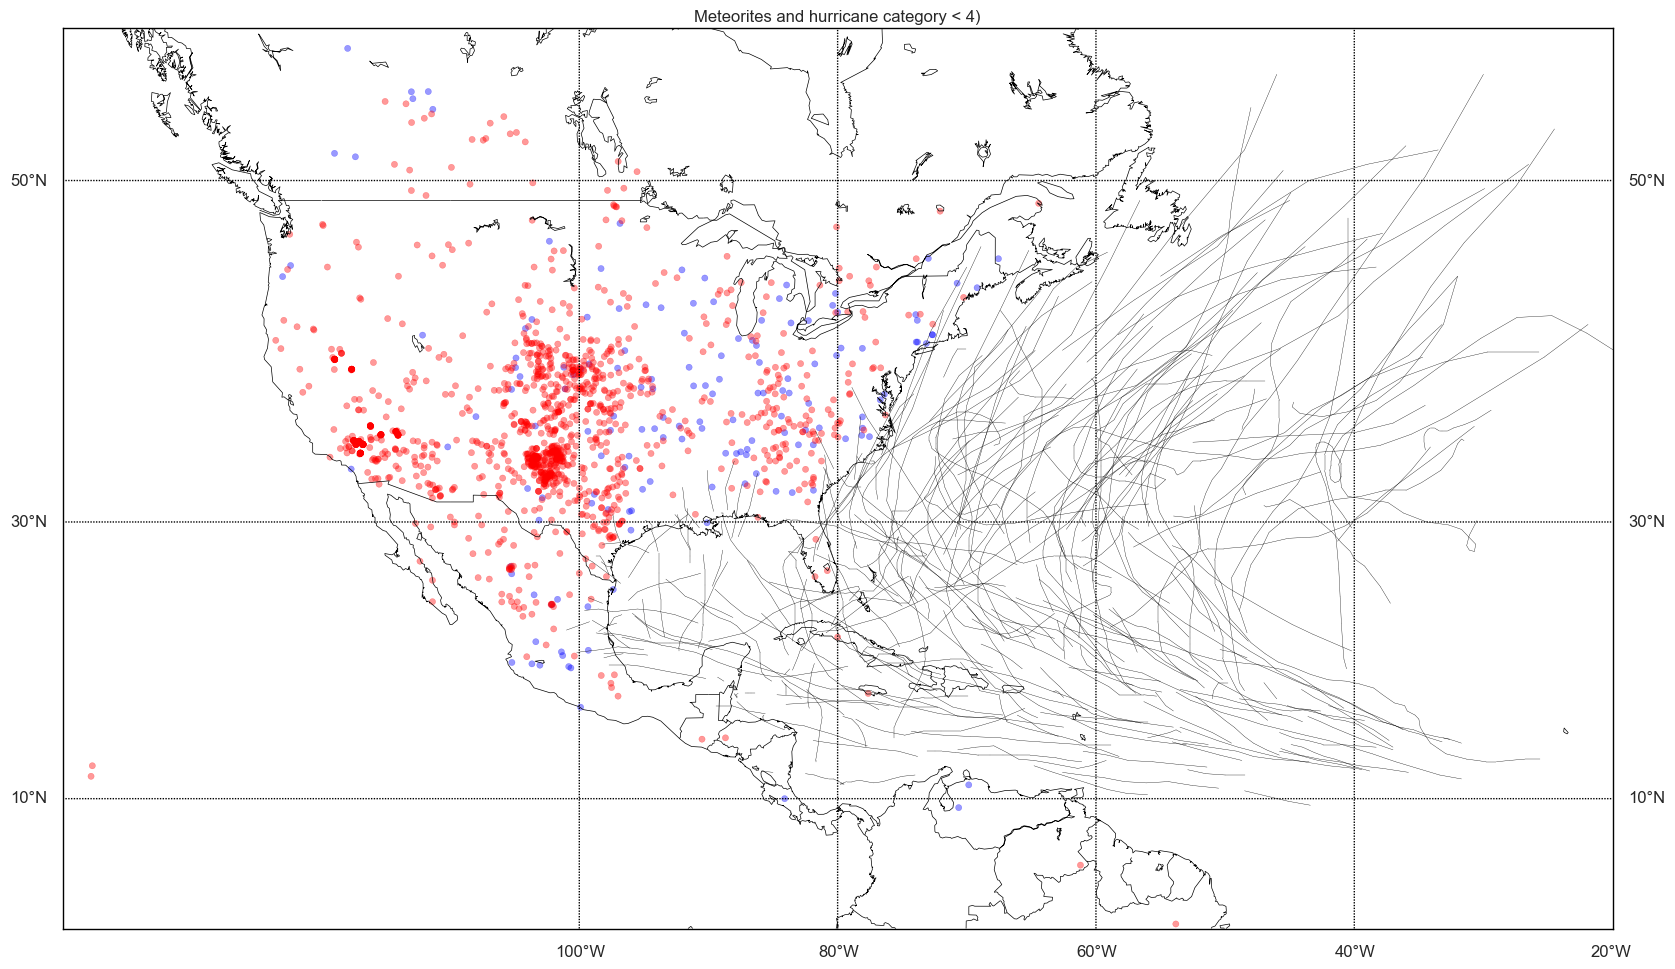

In [35]:
fig = plt.figure(figsize=(20, 14))
markersize =80
markertype = 'x'
markercolor = 'red'
markeralpha =1
m = Basemap(llcrnrlon=-140.,llcrnrlat=0.,urcrnrlon=-20.,urcrnrlat=57.,
            projection='merc',lat_1=20.,lat_2=40.,lon_0=-30.,
            resolution ='l',area_thresh=1000.)

# Convert locations to x/y coordinates and plot them as dots.
x1,y1=m(dfYH.reclong.values, dfYH.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color= dfYH.Colors, alpha=.4)
#read shapefile in order to input hurricane data 
shp_info = m.readshapefile('huralll020','hurrtracks',drawbounds=False)
# find names of storms that reached Cat 4.
names = []
for shapedict in m.hurrtracks_info:
    cat = shapedict['CATEGORY']
    name = shapedict['NAME']
    if cat in ['H4','H5'] and name not in names:
        # only use named storms.
        if name != 'NOT NAMED':  names.append(name)
# plot tracks of those storms.
for shapedict,shape in zip(m.hurrtracks_info,m.hurrtracks):
    name = shapedict['NAME']
    cat = shapedict['CATEGORY']
    if name in names:
        xx,yy = zip(*shape)
        # show part of track where storm < Cat 4 as white.
        if cat in ['H1','H2','H3']:
            m.plot(xx,yy,linewidth=0.25,color='black')
# draw coastlines, meridians and parallels.
m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
plt.title('Meteorites and hurricane category < 4)')
plt.show() 

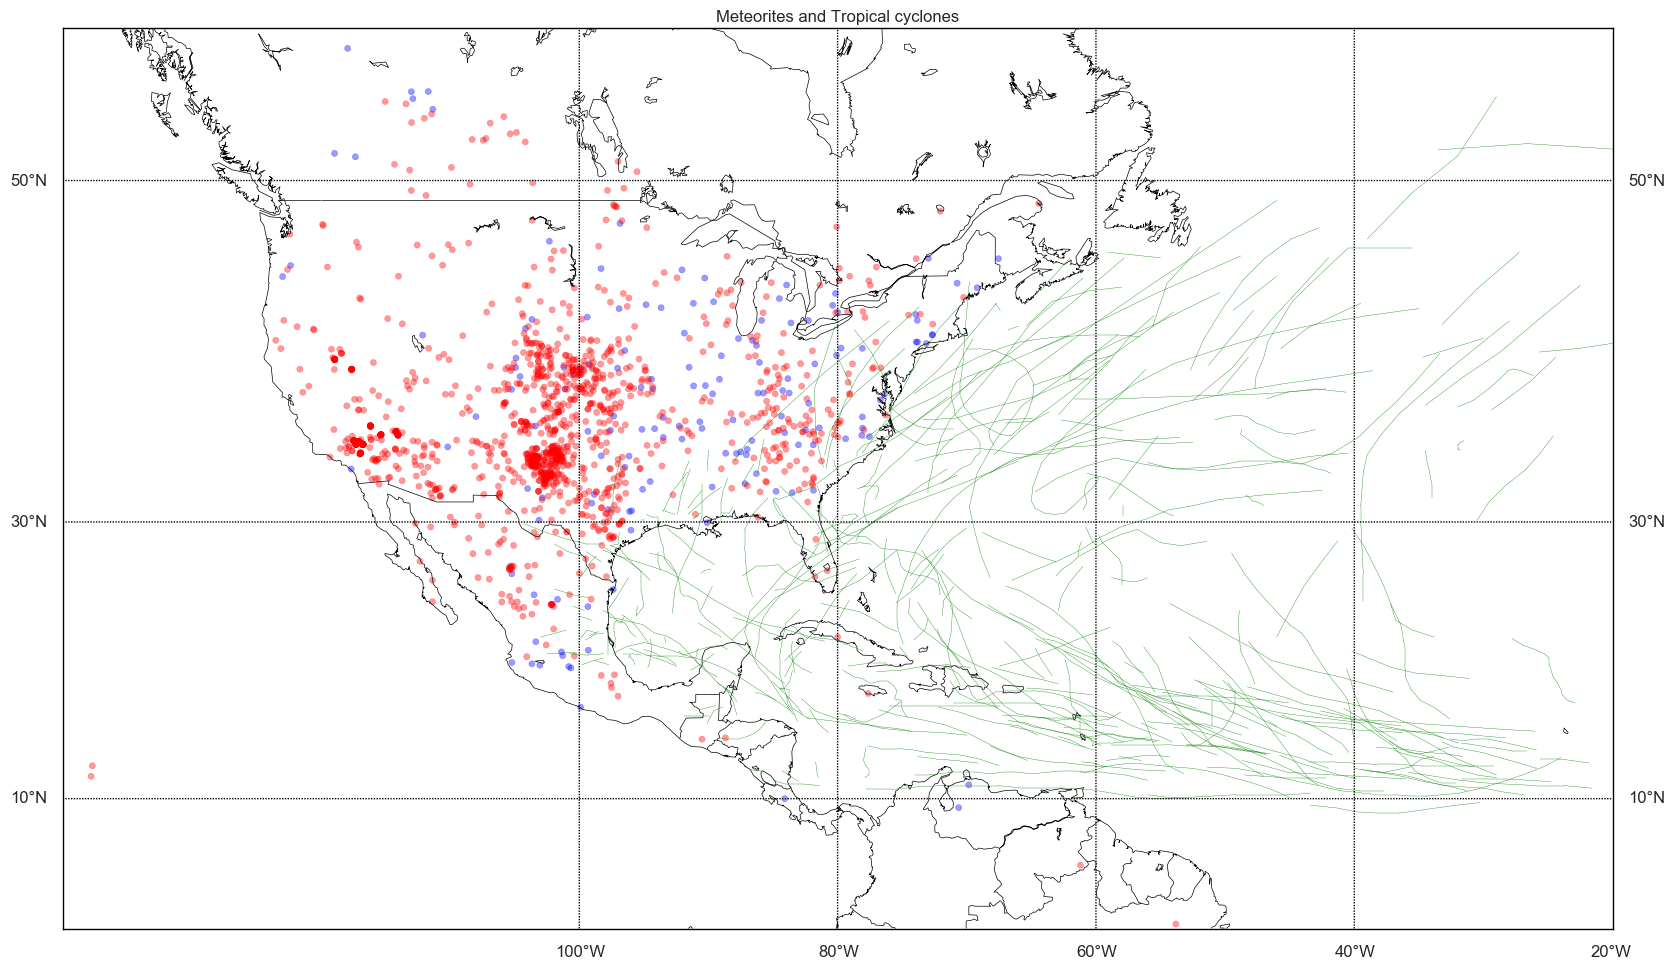

In [38]:
#plot found and fell meteorites in comparison to Tropical scale cyclones
fig = plt.figure(figsize=(20, 14))
markersize =80
markertype = 'x'
markercolor = 'red'
markeralpha = 1
m = Basemap(llcrnrlon=-140.,llcrnrlat=0.,urcrnrlon=-20.,urcrnrlat=57.,
            projection='merc',lat_1=20.,lat_2=40.,lon_0=-30.,
            resolution ='l',area_thresh=1000.)

# Convert locations to x/y coordinates and plot them as dots.
x1,y1=m(dfYH.reclong.values, dfYH.reclat.values)
m.scatter(x1,y1,markersize ,marker = '.', color= dfYH.Colors, alpha=.4)
#read shapefile in order to input hurricane data 
shp_info = m.readshapefile('huralll020','hurrtracks',drawbounds=False)
# find names of storms that reached Cat 4.
names = []
for shapedict in m.hurrtracks_info:
    cat = shapedict['CATEGORY']
    name = shapedict['NAME']
    if cat in ['H4','H5'] and name not in names:
        # only use named storms.
        if name != 'NOT NAMED':  names.append(name)
# plot tracks of those storms.
for shapedict,shape in zip(m.hurrtracks_info,m.hurrtracks):
    name = shapedict['NAME']
    cat = shapedict['CATEGORY']
    if name in names:
        xx,yy = zip(*shape)
        if cat in ["TS"]:
            m.plot(xx,yy,linewidth=0.25,color='green')
# draw coastlines, meridians and parallels.
m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
plt.title('Meteorites and Tropical cyclones')
plt.show() 

### The outcomes of the last four maps are:
### that some of the hurricanes(category>4) cross the coastline . Fortunately, we can see that these strong hurricanes are not so frequent as the other two categories in the following two maps.
### category < 4  hurricanes is more frequent and as it is observed in many cases they cross the coastline, get deeper in the country and they overlap with meteorites.Also , they take place in a larger area.
### Tropical cyclones are fewer than the hurricanes of category< 4 but they cross as well the coastline and get deeper within the country and as a result they have the maximum overlapping with recorded meteorites
### In general the place that these two phenomena take place most are different but they overlap in the edges, mainly in the coastline